In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, TimeoutException, NoSuchElementException
import time
import pandas as pd
from openpyxl import Workbook
from folium import plugins
import folium
import requests
from time import sleep

# Web Scraping - Hospitais

In [6]:
lista_hospitais = [
    'A C CAMARGO CANCER CENTER',
    'ASSOC AACD V CLEMENTINO',
    'CENTRO DE REFERENCIA DA SAUDE DA MULHER',
    'CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES',
    'CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO',
    'HOSP BENEF PORTUGUESA',
    'HOSP CLINICAS - HC DA FMUSP',
    'HOSP DA STA CASA DE STO AMARO',
    'HOSP DOM ALVARENGA',
    'HOSP EST - INSTITUTO DE INFECTOLOGIA EMILIO RIBAS',
    'HOSP EST DANTE PAZZANESE- FUND ADIB JATENE',
    'HOSP EST GRAJAU',
    'HOSP EST GUAIANASES - JESUS TEIXEIRA DA COSTA',
    'HOSP EST HELIOPOLIS',
    'HOSP EST INF CANDIDO FONTOURA',
    'HOSP EST INF DARCY VARGAS',
    'HOSP EST IPIRANGA',
    'HOSP EST ITAIM PAULISTA (SANTA MARCELINA)',
    'HOSP EST LOCAL DE SAPOPEMBA',
    'HOSP EST MANDAQUI',
    'HOSP EST MAT INTERLAGOS',
    'HOSP EST MAT LEONOR MENDES DE BARROS',
    'HOSP EST PEDREIRA',
    'HOSP EST REGIONAL SUL',
    'HOSP EST SAO MATEUS',
    'HOSP EST SAPOPEMBA',
    'HOSP EST TAIPAS - KATIA DE S RODRIGUES',
    'HOSP EST TRANSPLANT EURYCLIDES DE JESUS ZERBINI',
    'HOSP EST VL ALPINA',
    'HOSP EST VL NOVA CACHOEIRINHA',
    'HOSP EST VL PENTEADO - DR JOSE PANGELLA',
    'HOSP MONUMENTO-CEHM',
    'HOSP DO SERV PUB MUNICIPAL - HSPM',
    'HOSP MUN IGNACIO PROENCA DE GOUVEA',
    'HOSP MUN BENEDICTO MONTENEGRO',
    'HOSP MUN BRASILANDIA - ADIB JATENE',
    'HOSP MUN BRIGADEIRO',
    'HOSP MUN CACHOEIRINHA-MARIO DE M A SILVA',
    'HOSP MUN CAMPO LIMPO - FERNANDO M P DA ROCHA',
    'HOSP MUN CAPELA DO SOCORRO',
    'HOSP MUN CIDADE TIRADENTES-CARMEN PRUDENTE',
    'HOSP MUN DA BELA VISTA - SANTA DULCE DOS POBRES',
    'HOSP MUN ERMELINO MATARAZZO - ALIPIO CORREA NETTO',
    'HOSP MUN GILSON DE CASSIA M DE CARVALHO',
    'HOSP MUN GUARAPIRANGA',
    'HOSP MUN INF MENINO JESUS',
    'HOSP MUN ITAQUERA - WALDOMIRO DE PAULA',
    'HOSP MUN JABAQUARA - ARTUR RIBEIRO DE SABOYA',
    'HOSP MUN JOSANIAS CASTANHA BRAGA',
    'HOSP MUN M BOI MIRIM',
    'HOSP MUN MARIO DEGNI',
    'HOSP MUN PIRITUBA-JOSE SOARES HUNGRIA',
    'HOSP MUN SOROCABANA',
    'HOSP MUN TATUAPE - CARMINO CARICCHIO',
    'HOSP MUN TIDE SETUBAL',
    'HOSP MUN VL MARIA - VER JOSE STOROPOLLI',
    'HOSP MUN VL NHOCUNE-ALEXANDRE ZAIO',
    'HOSP N SRA DO PARI',
    'HOSP NIPO BRASILEIRO',
    'HOSP SAO PAULO - UNIDADE I - UNIFESP',
    'HOSP SERV ESTADUAL FCO MORATO DE OLIVEIRA',
    'HOSP STA MARCELINA',
    'HOSP UNIVERSITARIO - HU/USP',
    'HOSPITAL AMPARO MATERNAL',
    'HOSPITAL DO RIM E HIPERTENSAO',
    'HOSPITAL GRAACC INSTITUTO DE ONCOLOGIA PEDIATRICA IOP',
    'HOSPITAL ISRAELITA ALBERT EINSTEIN',
    'HOSPITAL JAPONES SANTA CRUZ',
    'HOSPITAL LEFORTE - LIBERDADE',
    'HOSPITAL SAO LUIZ GONZAGA',
    'IBCC UNIDADE JACANA',
    'INST BRAS. CONTROLE CANCER-IBCC',
    'INST CEMA DE OFTALMO E OTORRINO',
    'INST DO CANCER DO ESTADO DE SAO PAULO',
    'INST DO CORACAO - INCOR - HC/FMUSP',
    'INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO',
    'SANTA CASA DE SAO PAULO'
]

In [7]:
len(lista_hospitais)

77

In [10]:
endereco_hospital = []
telefone_hospital = []
horario_hospital = []
nome_completo_hospital = []
sem_endereco_hospital = []
hospital_nome = []
link_hospitais = []

def obter_endereco_hospital(hospital):
    driver = webdriver.Safari()
    #driver = webdriver.Safari(executable_path='/usr/bin/safaridriver')

    driver.get(f"https://www.google.com.br/search?q={hospital}")
    time.sleep(5)
    
    #Endereço
    try:
        endereco = driver.find_element(By.CLASS_NAME, 'LrzXr')
        endereco_hospital.append(endereco.text)
        hospital_nome.append(hospital)
    except NoSuchElementException as e:
        endereco_hospital.append("n/a")
        sem_endereco_hospital.append(hospital)
        hospital_nome.append("n/a")
    
    #Telefone
    try:
        telefone = driver.find_element(By.CSS_SELECTOR, '#kp-wp-tab-overview > div.TzHB6b.cLjAic.LMRCfc > div > div > div > div > div > div:nth-child(8) > div > div > div > span:nth-child(2)')
        telefone_hospital.append(telefone.text)
    except NoSuchElementException as e:
        telefone_hospital.append("n/a")
        
    #Horario
    try:
        horario = driver.find_element(By.CSS_SELECTOR, '#kp-wp-tab-overview > div.TzHB6b.cLjAic.LMRCfc > div > div > div > div > div > div:nth-child(6) > div > div > div.bJpcZ > div.vk_bk.h-n > span > span > span > span')
        horario_hospital.append(horario.text)
    except NoSuchElementException as e:
        horario_hospital.append("n/a")
     
    #Nome_Completo
    try:
        nome = driver.find_element(By.CSS_SELECTOR,'#kp-wp-tab-overview > div:nth-child(8) > div > div > div > div > div > div > div:nth-child(11) > div > div > div > div > span:nth-child(2) > span')
        nome_completo_hospital.append(nome.text)
    except NoSuchElementException as e:
        nome_completo_hospital.append("n/a")
    #Links (Mais Infos_
    url = driver.current_url
    link_hospitais.append(url)

    driver.quit()

In [11]:
# Itera sobre a lista de hospitais
for hospital in lista_hospitais:
    obter_endereco_hospital(hospital)

In [5]:
print("Nomes Hospitais:")
for nome_hospital in hospital_nome:
    #print(nome_hospital)

Nomes Hospitais:
n/a
n/a
n/a
CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES
CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO
n/a
HOSP CLINICAS - HC DA FMUSP
HOSP DA STA CASA DE STO AMARO
HOSP DOM ALVARENGA
HOSP EST - INSTITUTO DE INFECTOLOGIA EMILIO RIBAS
HOSP EST DANTE PAZZANESE- FUND ADIB JATENE
HOSP EST GRAJAU
HOSP EST GUAIANASES - JESUS TEIXEIRA DA COSTA
n/a
HOSP EST INF CANDIDO FONTOURA
HOSP EST INF DARCY VARGAS
HOSP EST IPIRANGA
HOSP EST ITAIM PAULISTA (SANTA MARCELINA)
HOSP EST LOCAL DE SAPOPEMBA
HOSP EST MANDAQUI
n/a
HOSP EST MAT LEONOR MENDES DE BARROS
HOSP EST PEDREIRA
n/a
n/a
HOSP EST SAPOPEMBA
n/a
HOSP EST TRANSPLANT EURYCLIDES DE JESUS ZERBINI
HOSP EST VL ALPINA
n/a
HOSP EST VL PENTEADO - DR JOSE PANGELLA
HOSP MONUMENTO-CEHM
HOSP DO SERV PUB MUNICIPAL - HSPM
HOSP MUN IGNACIO PROENCA DE GOUVEA
HOSP MUN BENEDICTO MONTENEGRO
HOSP MUN BRASILANDIA - ADIB JATENE
HOSP MUN BRIGADEIRO
HOSP MUN CACHOEIRINHA-MARIO DE M A SILVA
HOSP MUN CAMPO LIMPO - FERNANDO M P DA ROCHA
n/a
HOSP MUN CIDAD

In [ ]:
print("Endereço dos hospitais:")
for endereco in endereco_hospital:
    #print(endereco)

In [ ]:
print("Telefones dos hospitais:")
for telefone in telefone_hospital:
    #print(telefone)

In [ ]:
print("Horários dos hospitais:")
for horario in horario_hospital:
    #print(horario)

In [ ]:
print("Links para mais Infos:")
for link in link_hospitais:
    #print(link)

In [12]:
sem_endereco_hospital

['Hospital A.C.Camargo Cancer Center',
 'Centro de Referência de Saúde da Mulher',
 'Hospital do Servidor Público Municipal',
 'Hospital Nipo-Brasileiro',
 'HOSPITAL SAO PAULO - UNIDADE I - UNIFESP']

In [13]:
df_hospitais = pd.DataFrame({
    'Nome_Hospital': hospital_nome,
    'Endereco': endereco_hospital,
    'Telefone': telefone_hospital,
    'Horario': horario_hospital,
    'Link_+Infos': link_hospitais
})
df_hospitais

Nome_Hospital  \
0                                                 n/a   
1                            Hospital Ortopédico AACD   
2                                                 n/a   
3         BP – A Beneficência Portuguesa de São Paulo   
4   Hospital das Clínicas da Faculdade de Medicina...   
5                      Complexo Hospitalar Heliópolis   
6                                   Hospital Ipiranga   
7                  Ambulatório Maternidade Interlagos   
8                          Hospital Geral de Pedreira   
9                              HHospital Regional Sul   
10             Hospital Geral de São Mateus São Paulo   
11      Geral De Taipas-hosp Katia De Souza Rodrigues   
12           Hospital Geral de Vila Nova Cachoeirinha   
13                                                n/a   
14                              hospital pirituba ubs   
15                                                n/a   
16                                                n/a   
17                 Hospital Israelita Albert Einstein   
18         Instituto Brasileiro De Controle Do Câncer   
19  Irmandade da Santa Casa de Misericórdia de São...   

                                             Endereco        Telefone  \
0                                                 n/a             n/a   
1   Av. Professor Ascendino Reis, 724 - Ibirapuera...             n/a   
2                                                 n/a             n/a   
3   R. Maestro Cardim, 637 - Bela Vista, São Paulo...             n/a   
4   R. Dr. Ovídio Pires de Campos, 225 - Cerqueira...             n/a   
5   R. Cônego Xavier, 276 - Sacomã, São Paulo - SP...  (11) 2067-0300   
6   Av. Nazaré, 28 - Vila Monumento, São Paulo - S...             n/a   
7   R. Guaiúba, 312 - Cidade Dutra, São Paulo - SP...             n/a   
8   R. João Francisco de Moura, 251 - Vila Campo G...             n/a   
9   R. Gen. Roberto Alves de Carvalho Filho, 270 -...             n/a   
10  R. Ângelo de Cândia, 540/541 - Cidade São Mate...             n/a   
11        Vila Nova Parada, São Paulo - SP, 02675-031             n/a   
12  Av. Dep. Emílio Carlos, 3000 - Vila Espanhola,...             n/a   
13                                                n/a             n/a   
14  Av. Menotti Laudisio, 100 - Jardim Cidade Piri...  (11) 3394-8600   
15                                                n/a             n/a   
16                                                n/a             n/a   
17  Av. Albert Einstein, 627/701 - Morumbi, São Pa...  (11) 2151-1233   
18                   Mooca, São Paulo - SP, 03163-060             n/a   
19  R. Dr. Cesário Mota Júnior, 112 - Vila Buarque...  (11) 2176-7000   

            Horario                                        Link_+Infos  
0               n/a  https://www.google.com.br/search?q=Hospital%20...  
1               n/a  https://www.google.com.br/search?q=Hospital%20...  
2               n/a  https://www.google.com.br/search?q=Centro%20de...  
3               n/a  https://www.google.com.br/search?q=BP%20%E2%80...  
4               n/a  https://www.google.com.br/search?q=Hospital%20...  
5   Aberto 24 horas  https://www.google.com.br/search?q=Complexo%20...  
6               n/a  https://www.google.com.br/search?q=Hospital%20...  
7               n/a  https://www.google.com.br/search?q=Ambulat%C3%...  
8               n/a  https://www.google.com.br/search?q=Hospital%20...  
9               n/a  https://www.google.com.br/search?q=HHospital%2...  
10              n/a  https://www.google.com.br/search?q=Hospital%20...  
11              n/a  https://www.google.com.br/search?q=Geral%20De%...  
12              n/a  https://www.google.com.br/search?q=Hospital%20...  
13              n/a  https://www.google.com.br/search?q=Hospital%20...  
14  Aberto 24 horas  https://www.google.com.br/search?q=hospital%20...  
15              n/a  https://www.google.com.br/search?q=Hospital%20...  
16              n/a  https://www.google.com.br/search?q=HOSPITAL%20

In [14]:
df_hospitais = df_hospitais[df_hospitais['Nome_Hospital'] != 'n/a']
df_hospitais

Nome_Hospital  \
1                            Hospital Ortopédico AACD   
3         BP – A Beneficência Portuguesa de São Paulo   
4   Hospital das Clínicas da Faculdade de Medicina...   
5                      Complexo Hospitalar Heliópolis   
6                                   Hospital Ipiranga   
7                  Ambulatório Maternidade Interlagos   
8                          Hospital Geral de Pedreira   
9                              HHospital Regional Sul   
10             Hospital Geral de São Mateus São Paulo   
11      Geral De Taipas-hosp Katia De Souza Rodrigues   
12           Hospital Geral de Vila Nova Cachoeirinha   
14                              hospital pirituba ubs   
17                 Hospital Israelita Albert Einstein   
18         Instituto Brasileiro De Controle Do Câncer   
19  Irmandade da Santa Casa de Misericórdia de São...   

                                             Endereco        Telefone  \
1   Av. Professor Ascendino Reis, 724 - Ibirapuera...             n/a   
3   R. Maestro Cardim, 637 - Bela Vista, São Paulo...             n/a   
4   R. Dr. Ovídio Pires de Campos, 225 - Cerqueira...             n/a   
5   R. Cônego Xavier, 276 - Sacomã, São Paulo - SP...  (11) 2067-0300   
6   Av. Nazaré, 28 - Vila Monumento, São Paulo - S...             n/a   
7   R. Guaiúba, 312 - Cidade Dutra, São Paulo - SP...             n/a   
8   R. João Francisco de Moura, 251 - Vila Campo G...             n/a   
9   R. Gen. Roberto Alves de Carvalho Filho, 270 -...             n/a   
10  R. Ângelo de Cândia, 540/541 - Cidade São Mate...             n/a   
11        Vila Nova Parada, São Paulo - SP, 02675-031             n/a   
12  Av. Dep. Emílio Carlos, 3000 - Vila Espanhola,...             n/a   
14  Av. Menotti Laudisio, 100 - Jardim Cidade Piri...  (11) 3394-8600   
17  Av. Albert Einstein, 627/701 - Morumbi, São Pa...  (11) 2151-1233   
18                   Mooca, São Paulo - SP, 03163-060             n/a   
19  R. Dr. Cesário Mota Júnior, 112 - Vila Buarque...  (11) 2176-7000   

            Horario                                        Link_+Infos  
1               n/a  https://www.google.com.br/search?q=Hospital%20...  
3               n/a  https://www.google.com.br/search?q=BP%20%E2%80...  
4               n/a  https://www.google.com.br/search?q=Hospital%20...  
5   Aberto 24 horas  https://www.google.com.br/search?q=Complexo%20...  
6               n/a  https://www.google.com.br/search?q=Hospital%20...  
7               n/a  https://www.google.com.br/search?q=Ambulat%C3%...  
8               n/a  https://www.google.com.br/search?q=Hospital%20...  
9               n/a  https://www.google.com.br/search?q=HHospital%2...  
10              n/a  https://www.google.com.br/search?q=Hospital%20...  
11              n/a  https://www.google.com.br/search?q=Geral%20De%...  
12              n/a  https://www.google.com.br/search?q=Hospital%20...  
14  Aberto 24 horas  https://www.google.com.br/search?q=hospital%20...  
17  Aberto 24 horas  https://www.google.com.br/search?q=Hospital%20...  
18              n/a  https://www.google.com.br/search?q=Instituto%2...  
19  Aberto 24 horas  https://www.google.com.br/search?q=Irmandade%2...

# Pegar localização do hosptais

In [11]:
# Substitua "SUA_CHAVE_DE_API" pelo seu próprio chave de API do OpenCage Geocoding
api_key = "c74811d72ca942aab042634058318311"

# Lista de nomes de hospitais
hospitais = df_hospitais["Endereco"].to_list()
list_nao_encontrado = []
lista_longitude = []
lista_latitude = []

# Loop através da lista de hospitais
for hospital_name in hospitais:
    # Construa a consulta com o nome do hospital
    query = hospital_name

    # Construa a URL da API
    url = f"https://api.opencagedata.com/geocode/v1/json?q={query}&key={api_key}"

    # Faça a solicitação à API
    response = requests.get(url)

    # Verifique se a solicitação foi bem-sucedida
    if response.status_code == 200:
        data = response.json()
        # Extraia as coordenadas de latitude e longitude a partir dos resultados
        if len(data["results"]) > 0:
            latitude = data["results"][0]["geometry"]["lat"]
            lista_latitude.append(latitude)
            longitude = data["results"][0]["geometry"]["lng"]
            lista_longitude.append(longitude)
            print(f"Hospital: {hospital_name}, Latitude: {latitude}, Longitude: {longitude}")
        else:
            lista_latitude.append(0)
            lista_longitude.append(0)
            print(hospital_name)
            list_nao_encontrado.append(hospital_name)
    else:
        print(f"Erro na solicitação à API para o hospital {hospital_name}")

# Adiciona as listas de latitude e longitude ao DataFrame
df_hospitais["Latitude"] = lista_latitude
df_hospitais["Longitude"] = lista_longitude

Hospital:  R. Napoleão de Barros, 715 - Vila Clementino, São Paulo - SP, 04024-002, Latitude: -23.5977766, Longitude: -46.6435335
Hospital: Alameda Rodrigo de Brum, 1989 - Ermelino Matarazzo, São Paulo - SP, 03807-230, Latitude: -23.4996441, Longitude: -46.4729162
Hospital: Av. Albert Einstein, 627/701 - Morumbi, São Paulo - SP, 05652-900, Latitude: -23.6001904, Longitude: -46.7166701
Hospital: Av. Brigadeiro Luís Antônio, 2651 - Bela Vista, São Paulo - SP, 01401-000, Latitude: -23.5630334, Longitude: -46.6455722
Hospital: Av. Brigadeiro Luís Antônio, 4805 - Jardim Paulista, São Paulo - SP, 01401-002, Latitude: -23.5687429, Longitude: -46.6499868
Hospital: Av. Celso Garcia, 2477 - Belenzinho, São Paulo - SP, 03015-000, Latitude: -23.5475, Longitude: -46.63611
Hospital: Av. Celso Garcia, 4815 - Tatuapé, São Paulo - SP, 03085-030, Latitude: -23.5316111, Longitude: -46.5595066
Hospital: Av. Dep. Emílio Carlos, 3000 - Vila Espanhola, São Paulo - SP, 02720-200, Latitude: -23.489747, Longitu

In [12]:
df_hospitais = df_hospitais[df_hospitais['Nome_Hospital'] != 'n/a']
df_hospitais

Nome_Hospital  \
0                                  HOSPITAL SAO PAULO   
1   HOSP MUN ERMELINO MATARAZZO - ALIPIO CORREA NETTO   
2                  HOSPITAL ISRAELITA ALBERT EINSTEIN   
3     HOSP EST TRANSPLANT EURYCLIDES DE JESUS ZERBINI   
4                                 HOSP MUN BRIGADEIRO   
..                                                ...   
69          HOSP SERV ESTADUAL FCO MORATO DE OLIVEIRA   
70  HOSPITAL GRAACC INSTITUTO DE ONCOLOGIA PEDIATR...   
71                      HOSP EST INF CANDIDO FONTOURA   
72                 Hospital A.C.Camargo Cancer Center   
73      Geral De Taipas-hosp Katia De Souza Rodrigues   

                                             Endereco        Telefone  \
0    R. Napoleão de Barros, 715 - Vila Clementino,...  (11) 5576-4000   
1   Alameda Rodrigo de Brum, 1989 - Ermelino Matar...             NaN   
2   Av. Albert Einstein, 627/701 - Morumbi, São Pa...  (11) 2151-1233   
3   Av. Brigadeiro Luís Antônio, 2651 - Bela Vista...  (11) 3170-6121   
4   Av. Brigadeiro Luís Antônio, 4805 - Jardim Pau...             NaN   
..                                                ...             ...   
69  Rua Pedro de Toledo, 1800 - Vila Clementino, S...             NaN   
70  Rua Pedro de Toledo, 572 - Vila Clementino, Sã...             NaN   
71  Rua Siqueira Bueno, 1757 - Belenzinho, São Pau...  (11) 2603-5300   
72  Rua Tamandaré, 753 - Liberdade, São Paulo - SP...   11) 2189-5000   
73        Vila Nova Parada, São Paulo - SP, 02675-031             NaN   

            Horario                                        Link_+Infos  \
0   Aberto 24 horas                                                NaN   
1               NaN  https://www.google.com.br/search?q=HOSP%20MUN%...   
2   Aberto 24 horas  https://www.google.com.br/search?q=HOSPITAL%20...   
3   Aberto 24 horas  https://www.google.com.br/search?q=HOSP%20EST%...   
4               NaN  https://www.google.com.br/search?q=HOSP%20MUN%...   
..              ...                                                ...   
69              NaN  https://www.google.com.br/search?q=HOSP%20SERV...   
70              NaN  https://www.google.com.br/search?q=HOSPITAL%20...   
71  Aberto 24 horas  https://www.google.com.br/search?q=HOSP%20EST%...   
72  Aberto 24 horas                                                NaN   
73              NaN  https://www.google.com.br/search?q=Geral%20De%...   

     Latitude  Longitude  
0  -23.597777 -46.643533  
1  -23.499644 -46.472916  
2  -23.600190 -46.716670  
3  -23.563033 -46.645572  
4  -23.568743 -46.649987  
..        ...        ...  
69 -23.597813 -46.649864  
70 -23.598507 -46.640775  
71 -23.547500 -46.636110  
72 -23.565213 -46.635978  
73  41.705100 -70.227000  

[74 rows x 7 columns]

In [16]:
workbook = Workbook()
sheet = workbook.active
sheet.title = "Informacoes_Hospitais"

# Adicionar cabeçalhos
sheet.append(['Nome_Hospital','Endereço', 'Telefone', 'Horário', 'Link_+Infos','Latitude','Longitude'])

# Adicionar informações
for nome_completo, endereco, telefone, horario, link_info, latitude, longitude in zip(nome_completo_hospital, endereco_hospital, telefone_hospital, horario_hospital, link_infos, latitude, longitude):
    sheet.append([nome_completo, endereco, telefone, horario, link_info, latitude, longitude])

# Salvar a planilha
workbook.save("/Users/viniperez/Downloads/Informacoes_hospitais.xlsx")
print("Informações dos hospitais salvas no arquivo 'Informacoes_hospitais.xlsx'")

Informações dos hospitais salvas no arquivo 'Informacoes_hospitais.xlsx'


# Carrega DataFrame que salvamos acima

In [15]:
df_hospitais = pd.read_excel(r"c:\Users\Thiago\Downloads\informacoes_hospitais (1).xlsx")
df_hospitais

df_hospitais = df_hospitais.fillna("-")
df_hospitais.columns

Index(['Nome_Hospital', 'Endereço', 'Telefone', 'Horário', 'Link_+Infos',
       'Latitude', 'Longitude', 'Capacidade_Maxima', 'Valor'],
      dtype='object')

# Plotar no mapa

In [5]:
mapa = folium.Map(location=[-23.550520, -46.633308], zoom_start=12)

for index, row in df_hospitais.iterrows():
    # Cria o conteúdo da popup com informações adicionais e link clicável
    popup_content = f"<b>{row['Nome_Hospital']}</b><br>" \
                    f"Endereço: {row['Endereço']}<br>" \
                    f"Telefone: {row['Telefone']}<br>" \
                    f"Horário: {row['Horário']}<br>" \
                    f"Link para + Infos: <a href='{row['Link_+Infos']}' target='_blank'>Clique aqui</a>"

    icon = folium.CustomIcon(icon_image='/Users/viniperez/Downloads/3448513.png',
                             icon_size=(50, 50),
                             icon_anchor=(14, 50))

    # Adiciona o marcador com a popup personalizada
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=folium.Popup(popup_content, max_width=300),  # Define uma largura máxima para a popup
                  icon=icon).add_to(mapa)

# Exibe o mapa diretamente no Jupyter Notebook
mapa

FileNotFoundError: [Errno 2] No such file or directory: '/Users/viniperez/Downloads/3448513.png'

# Mapa com escala de cor


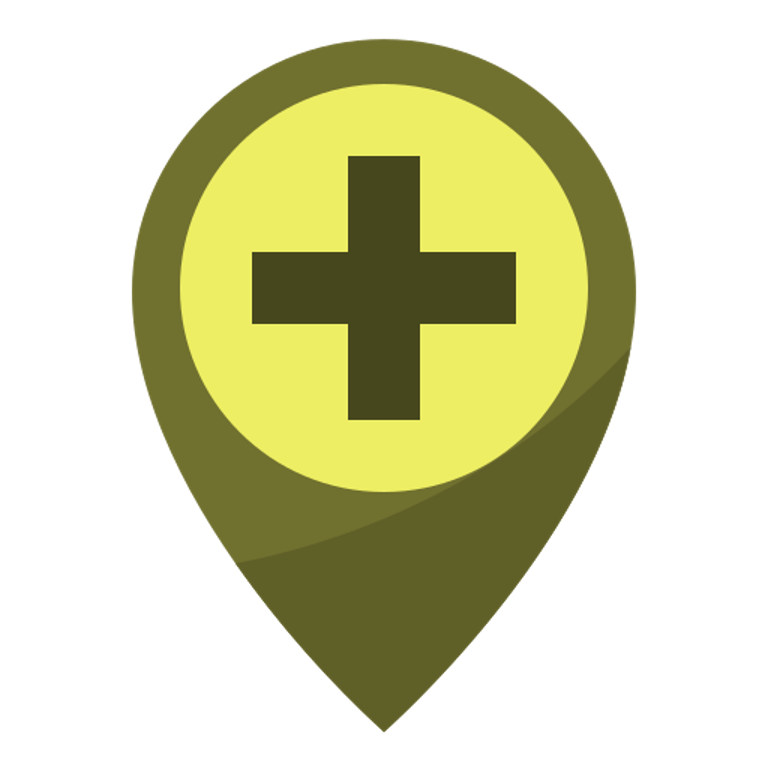
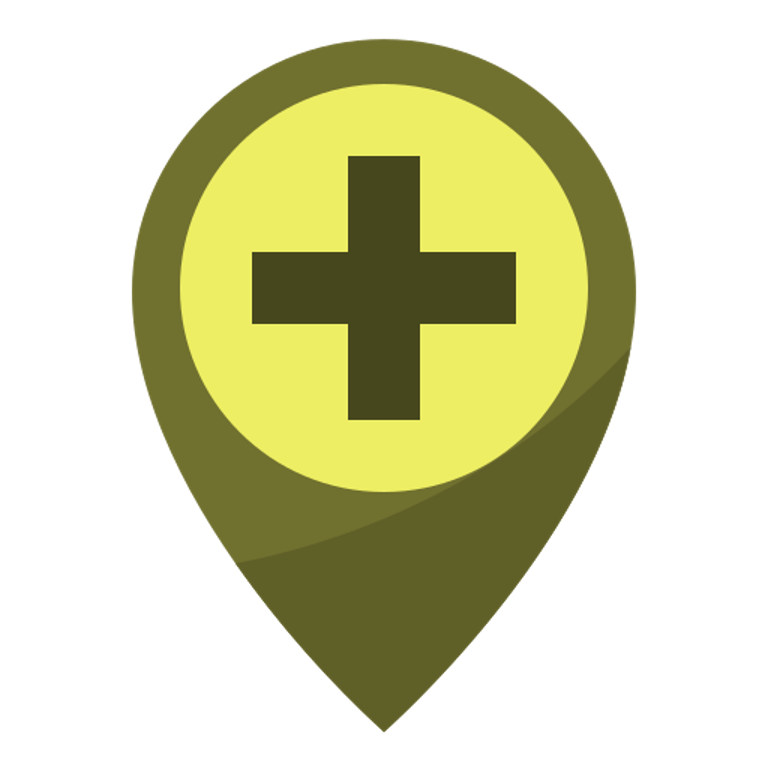
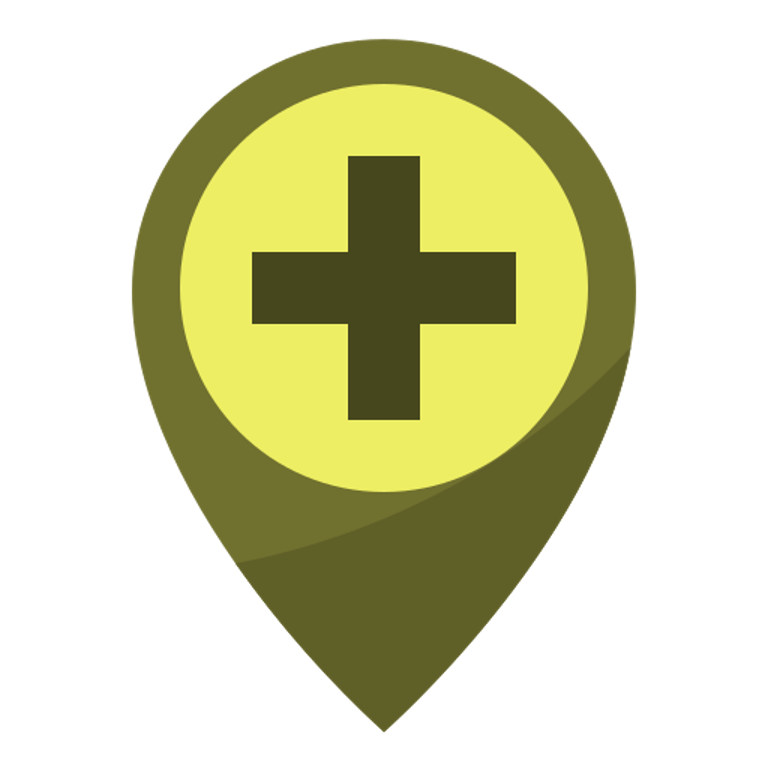
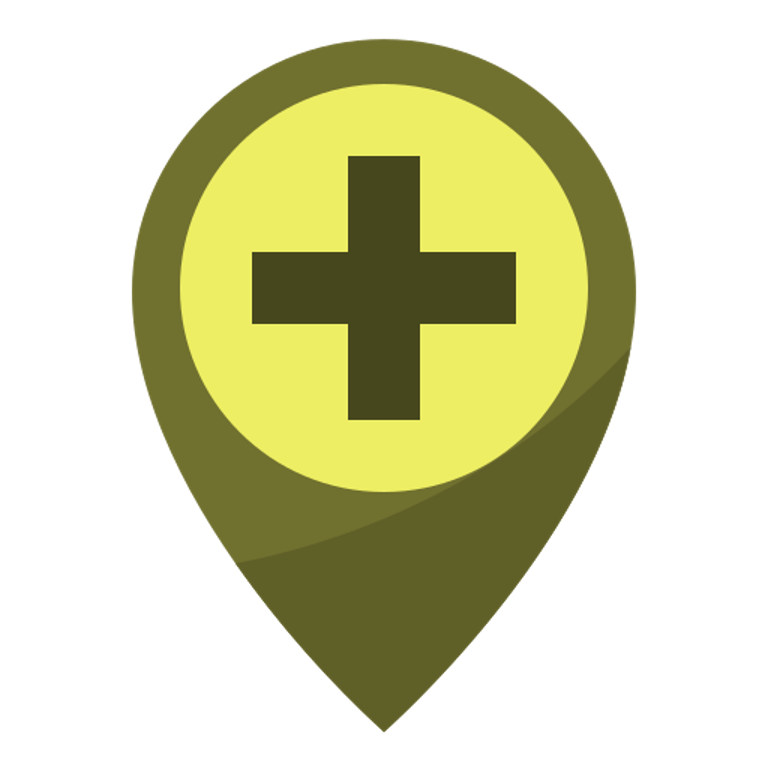
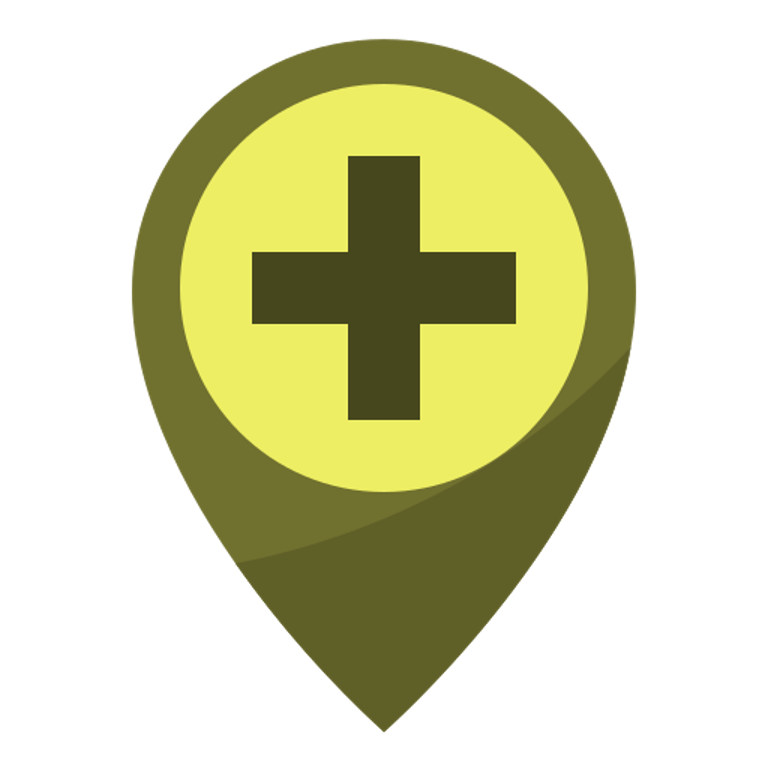
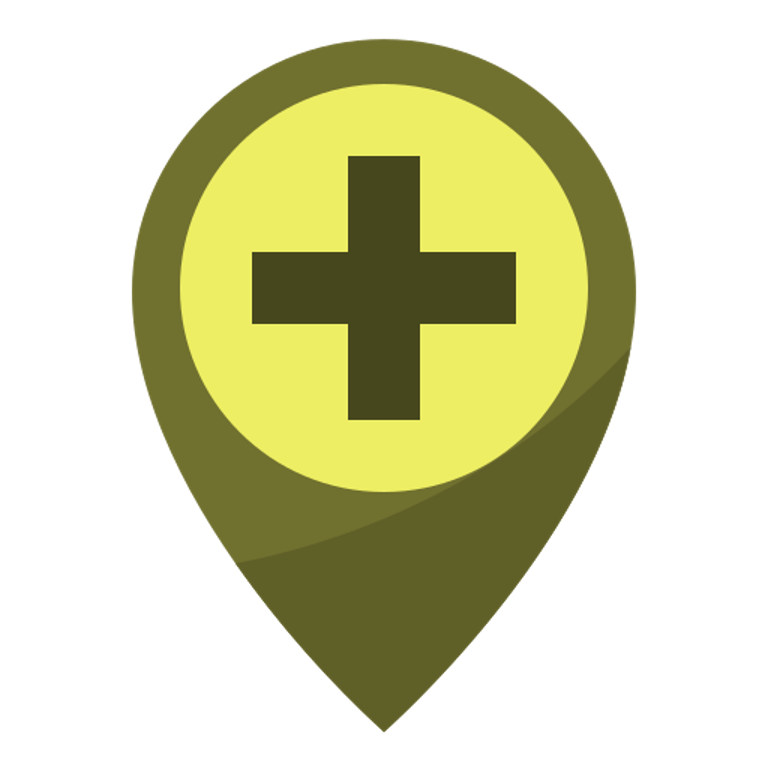
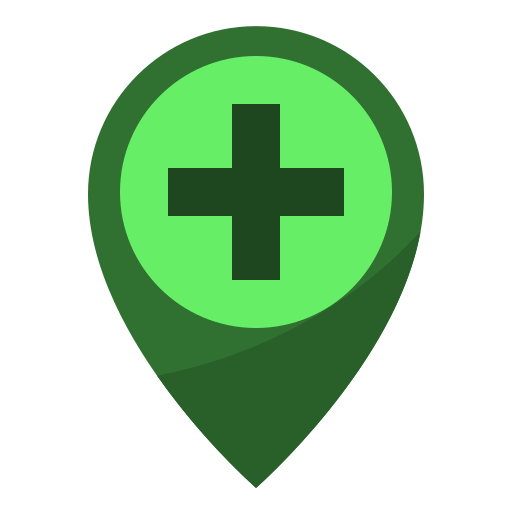
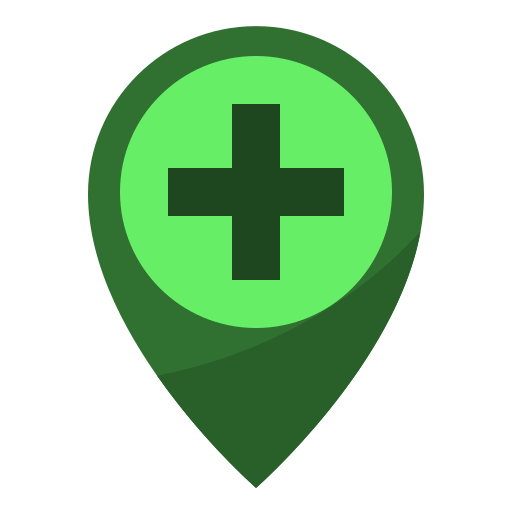
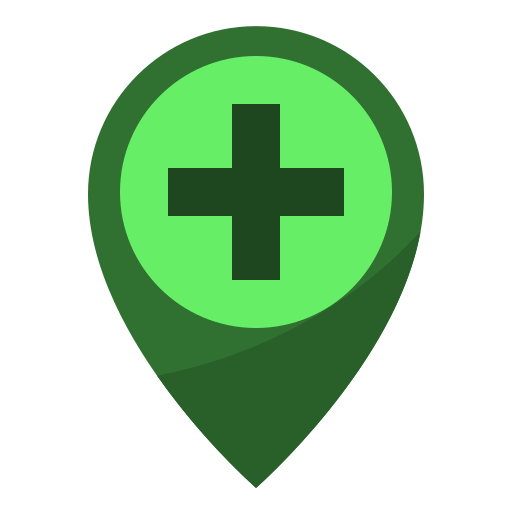
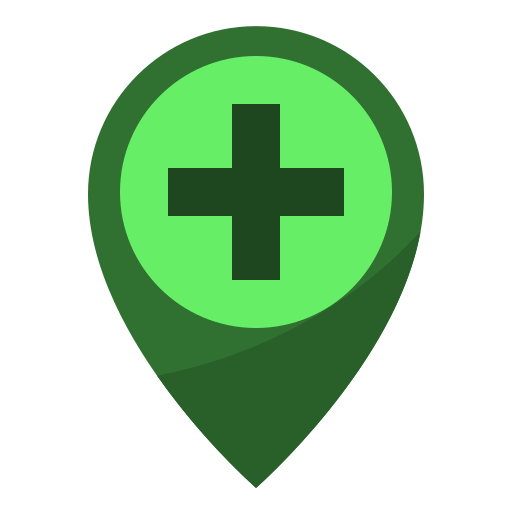
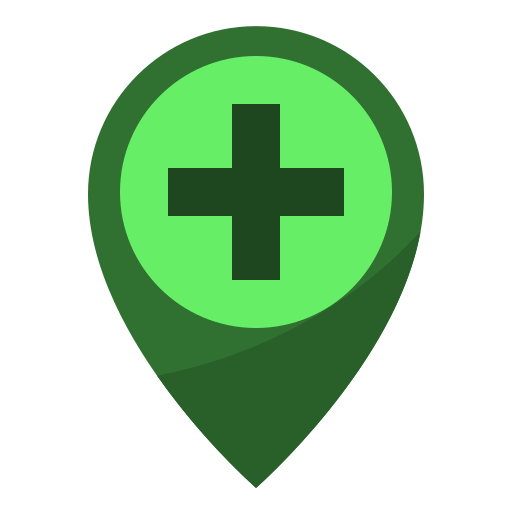
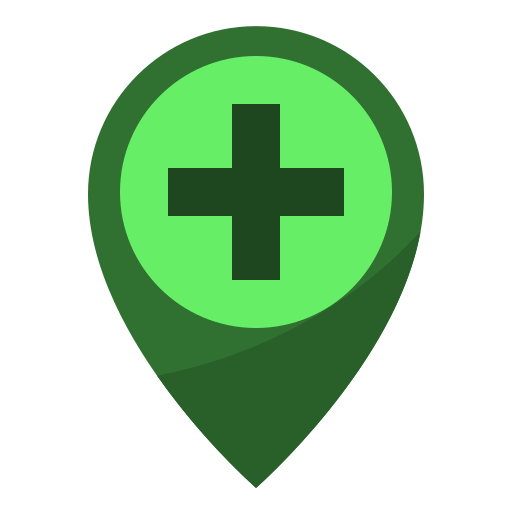
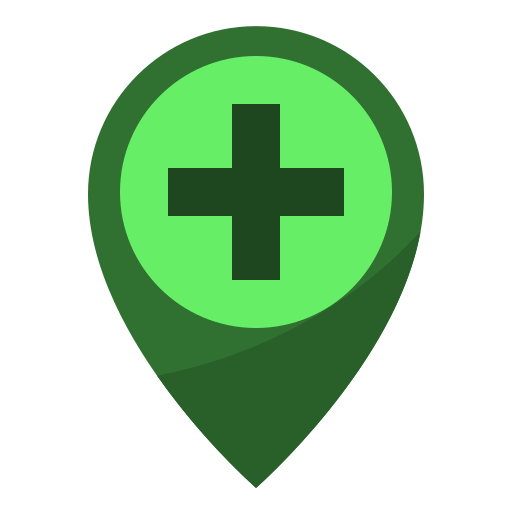
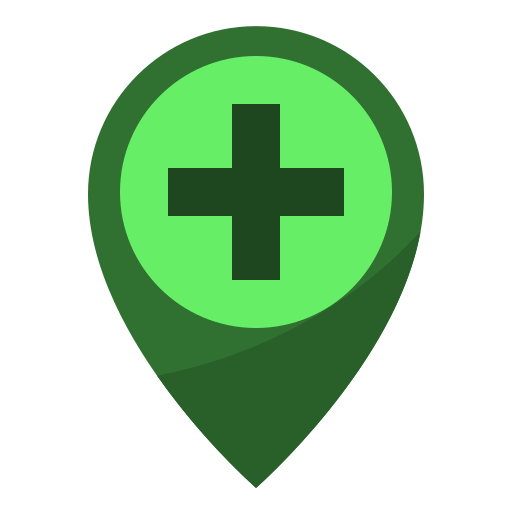
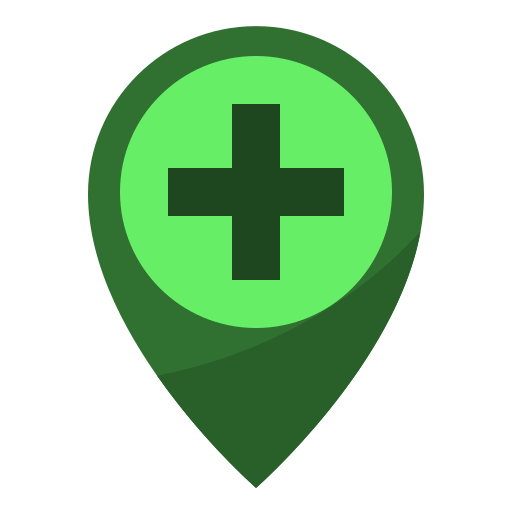
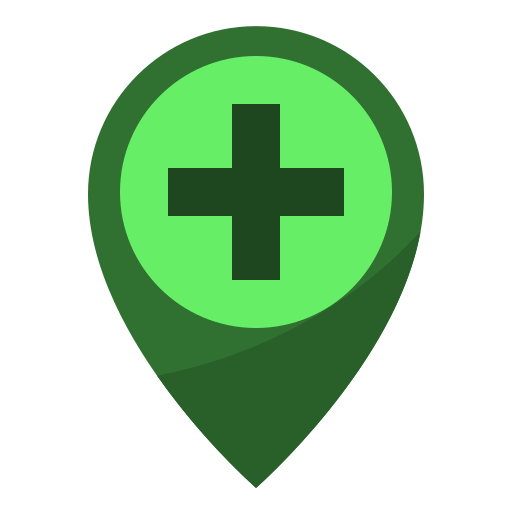
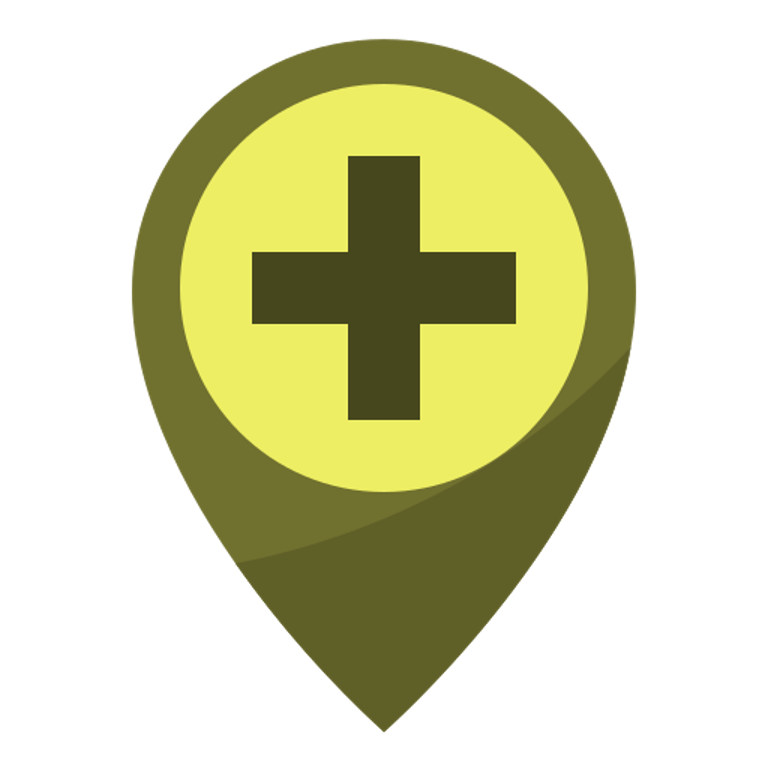
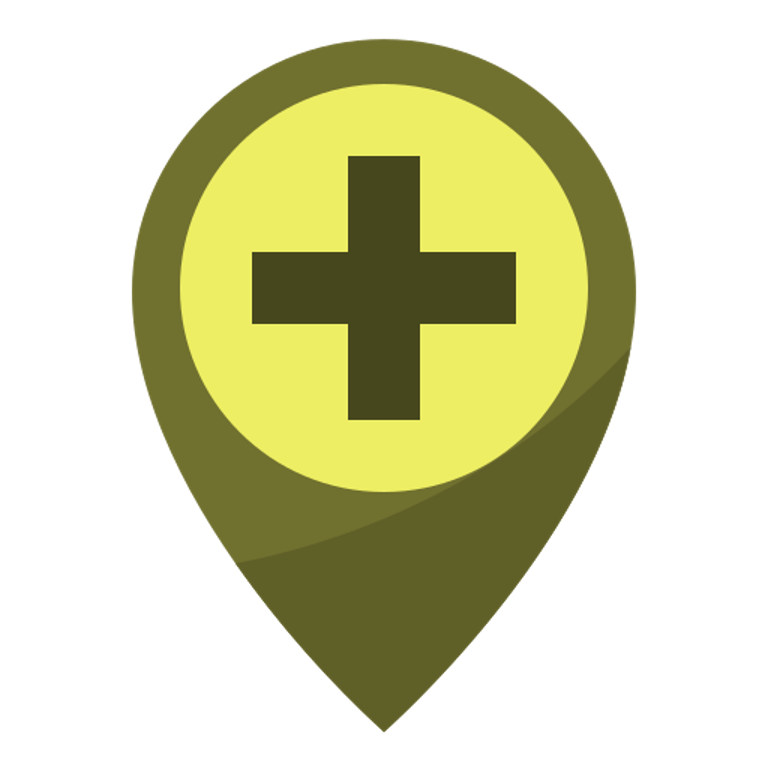
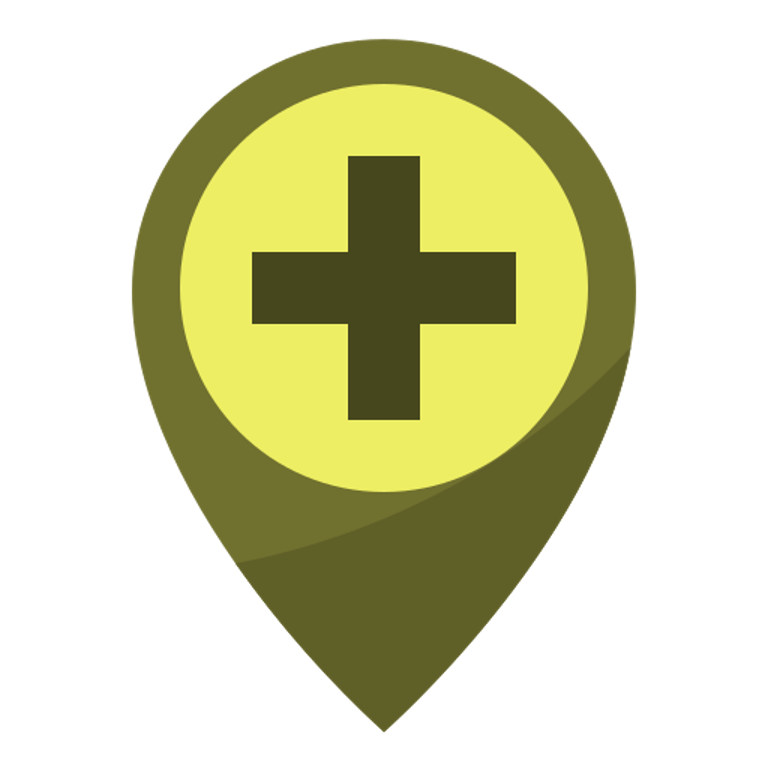
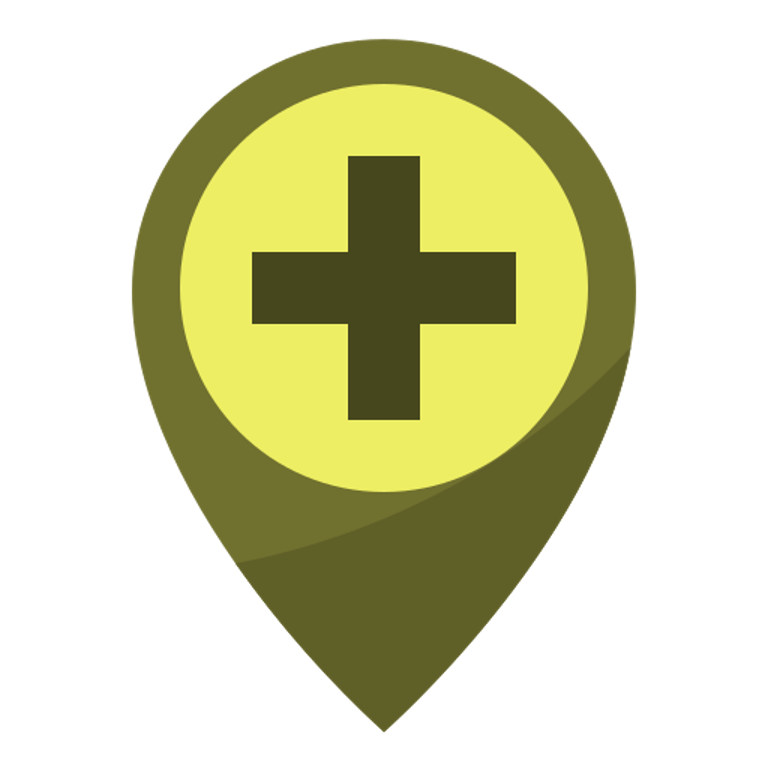
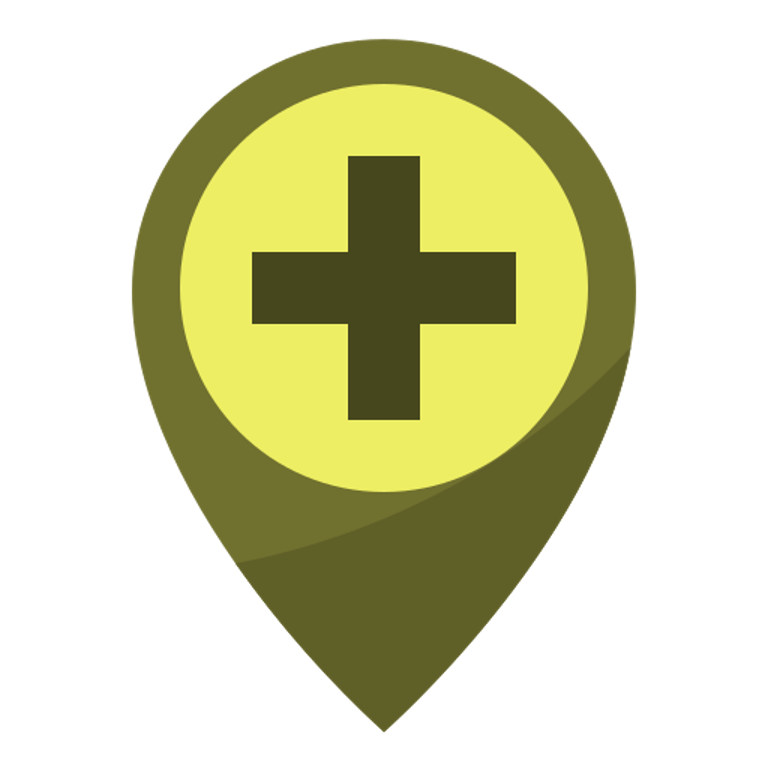
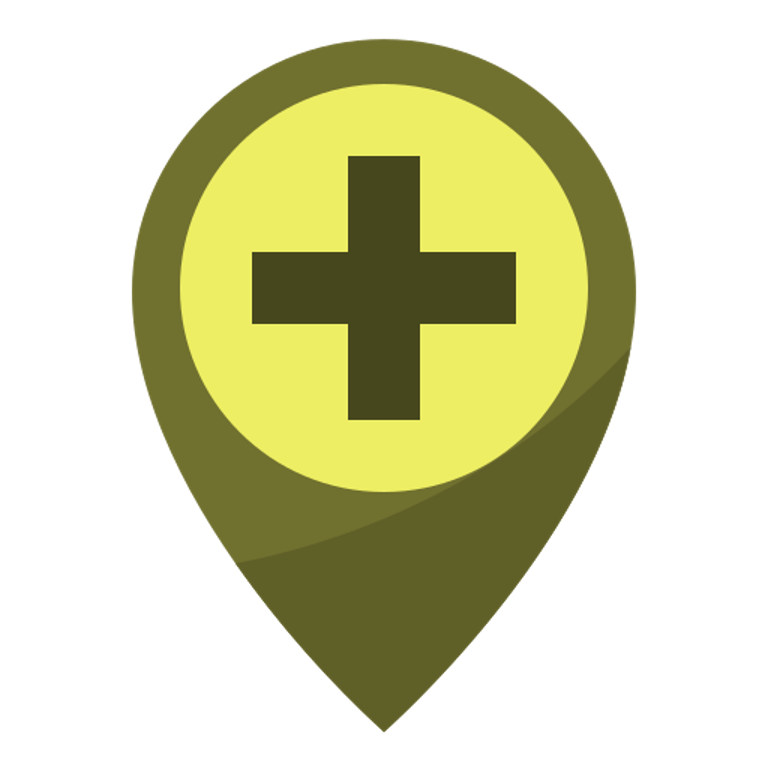
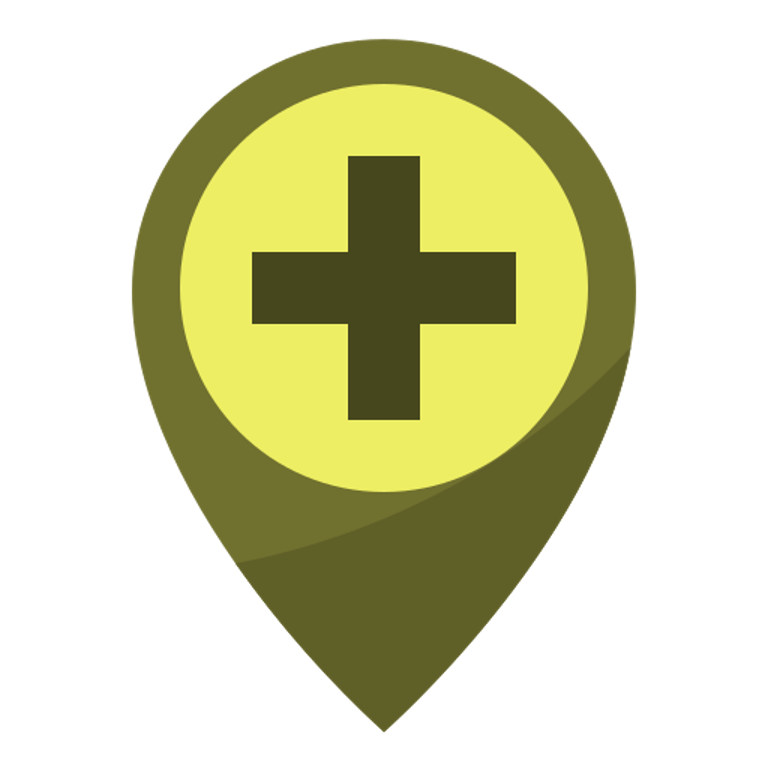
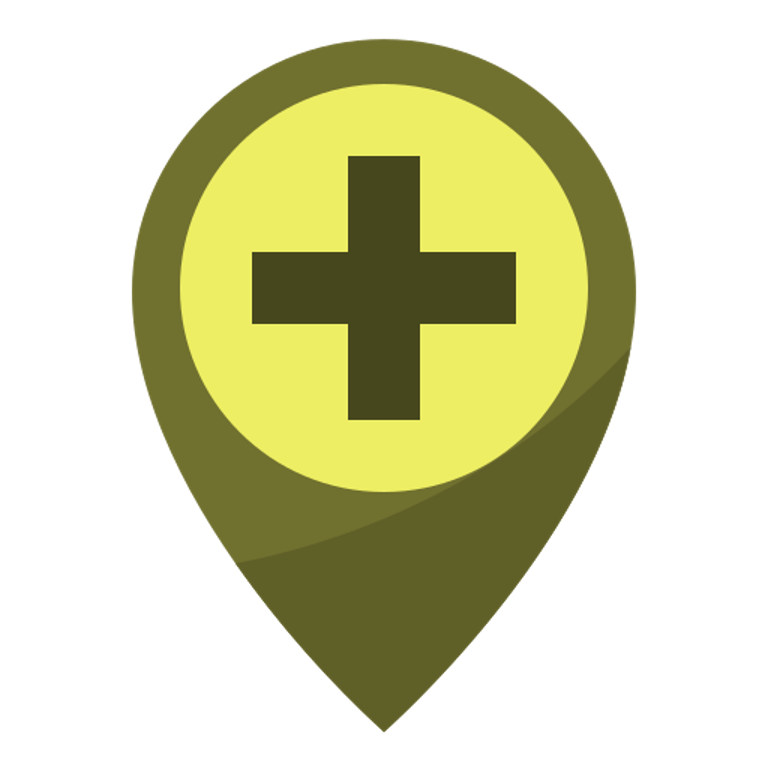
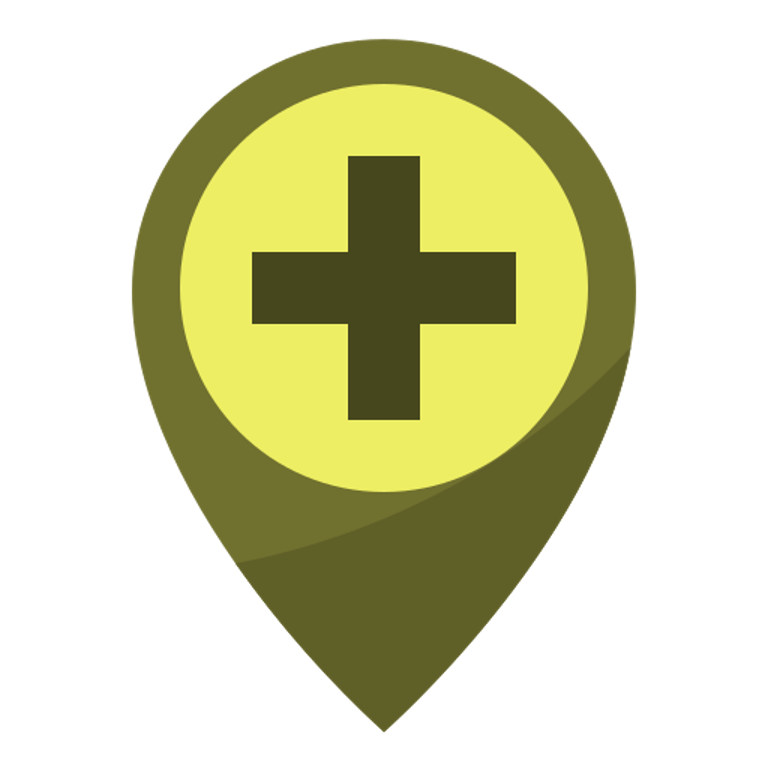
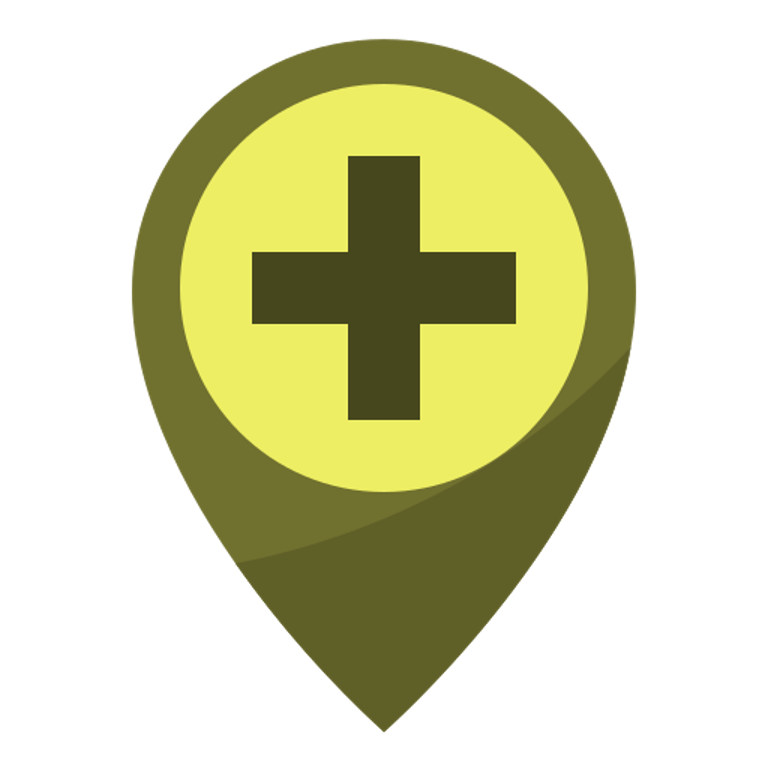
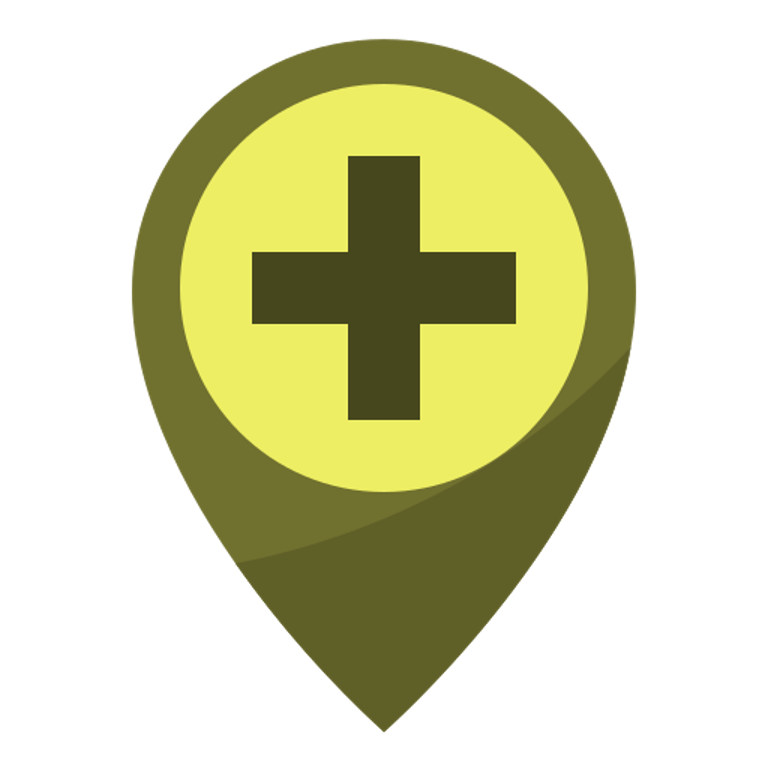
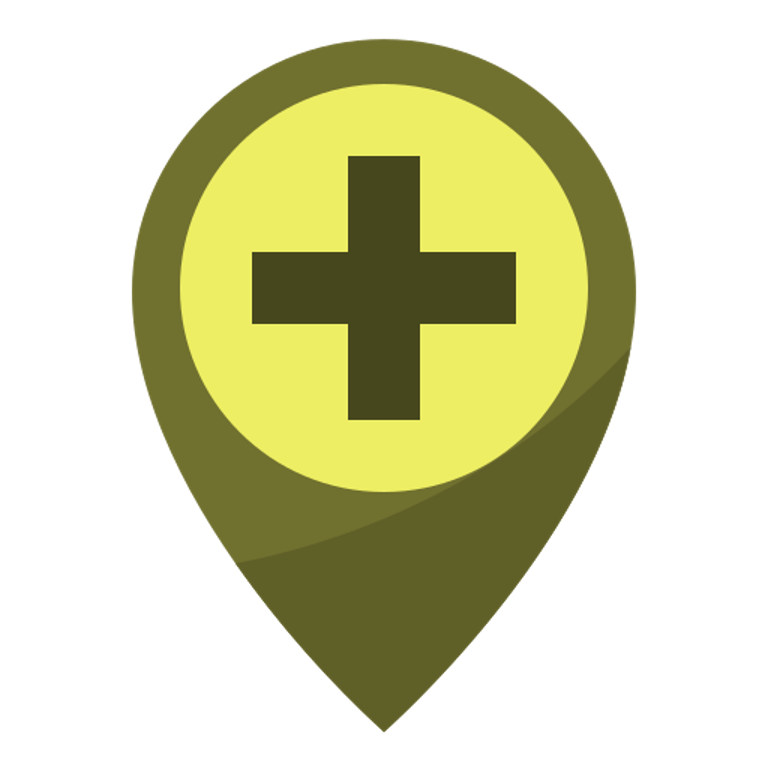
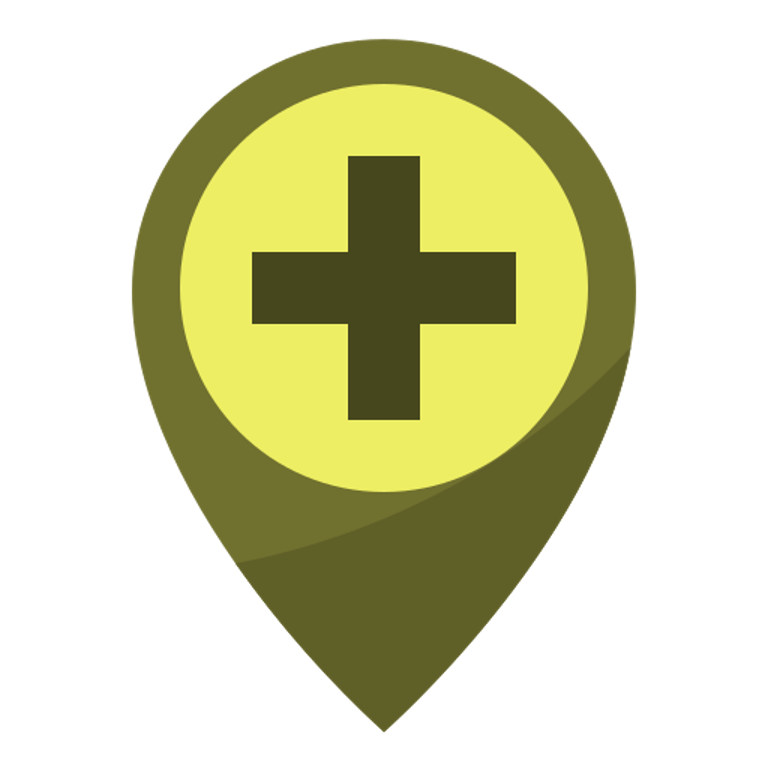
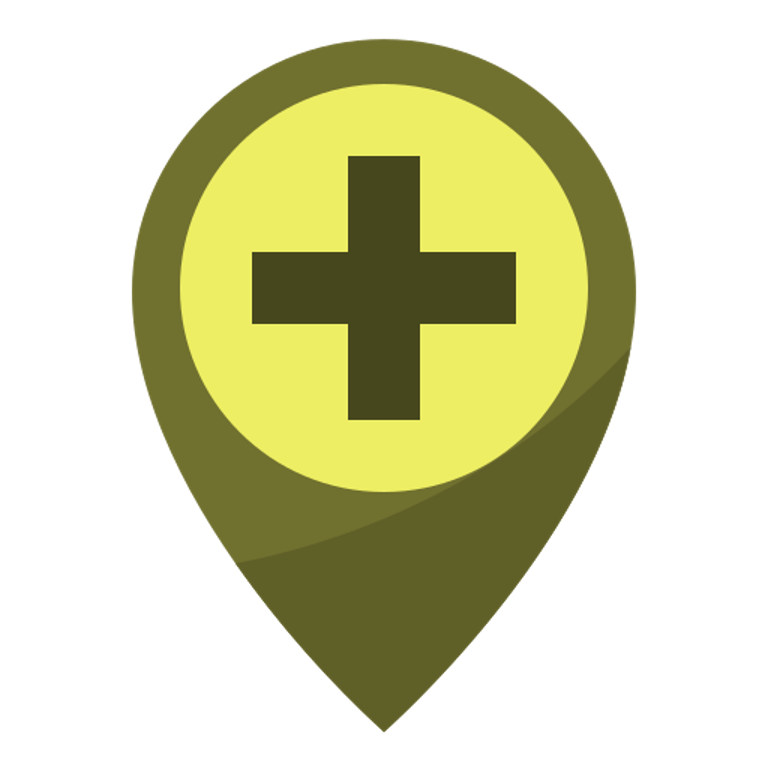
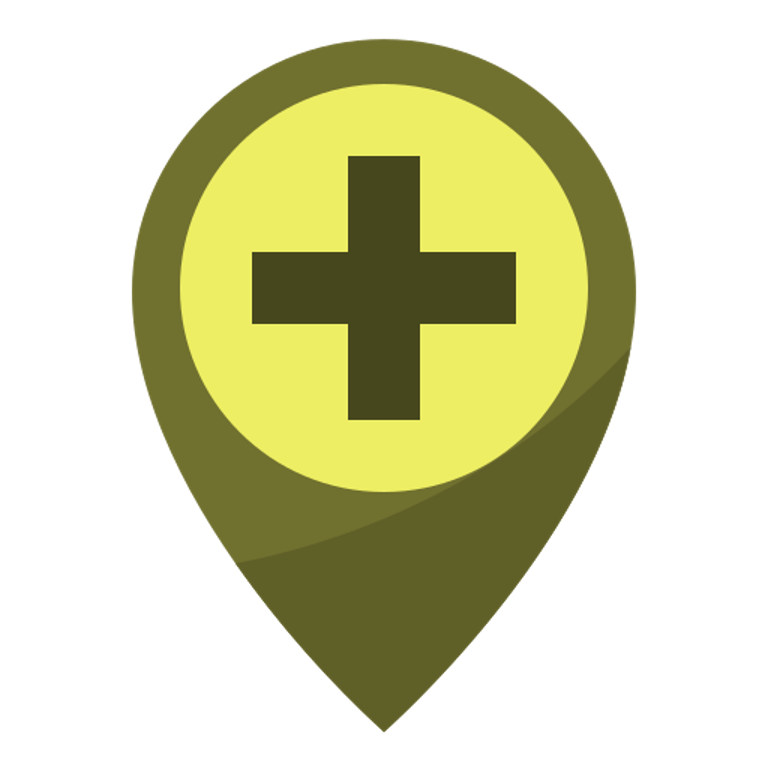
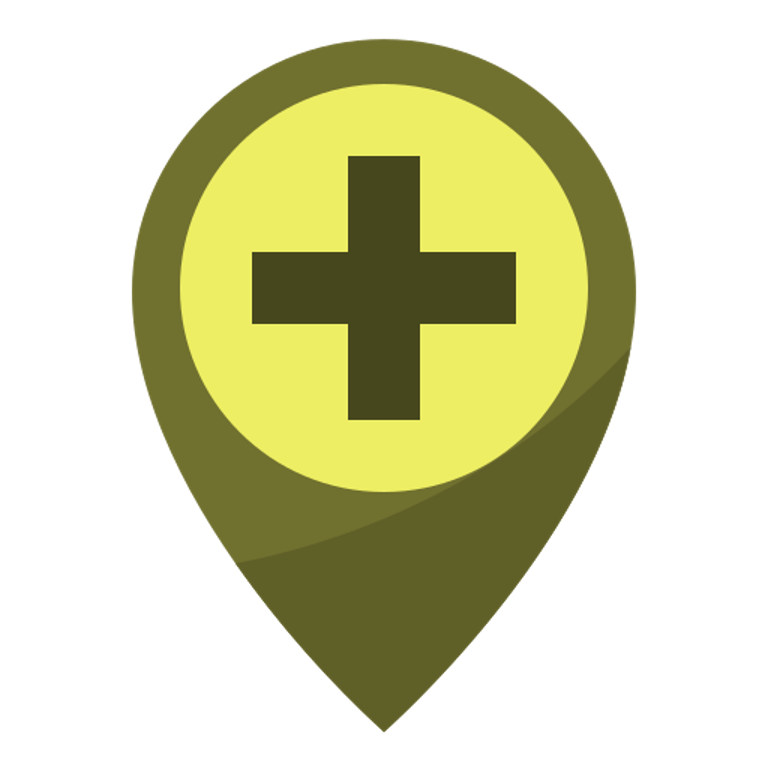
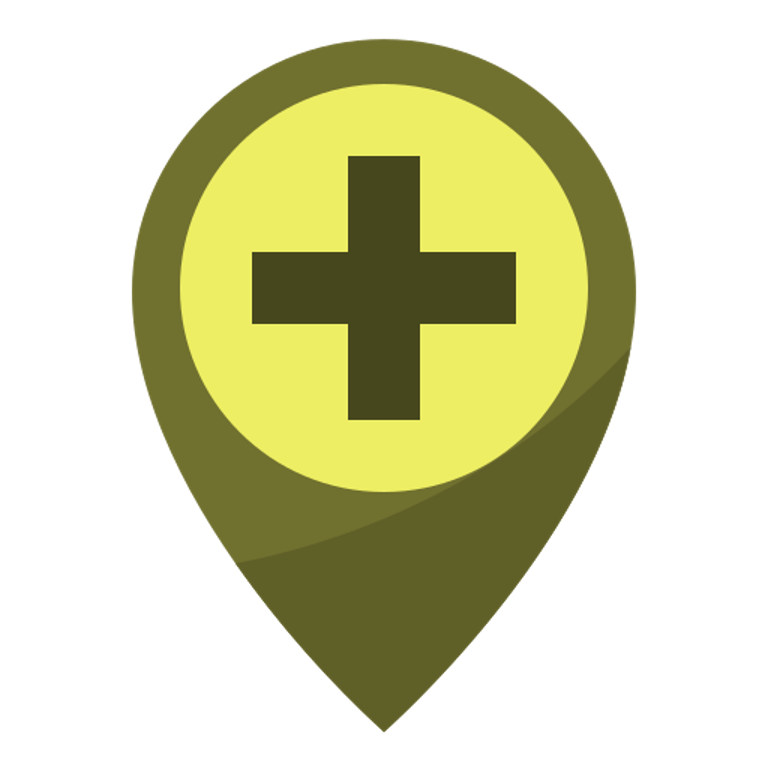
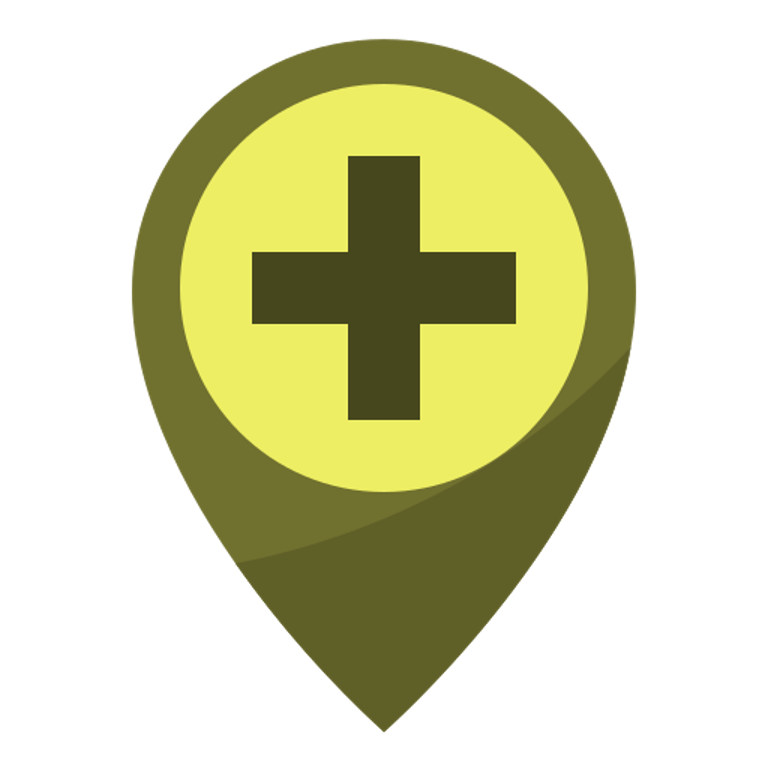
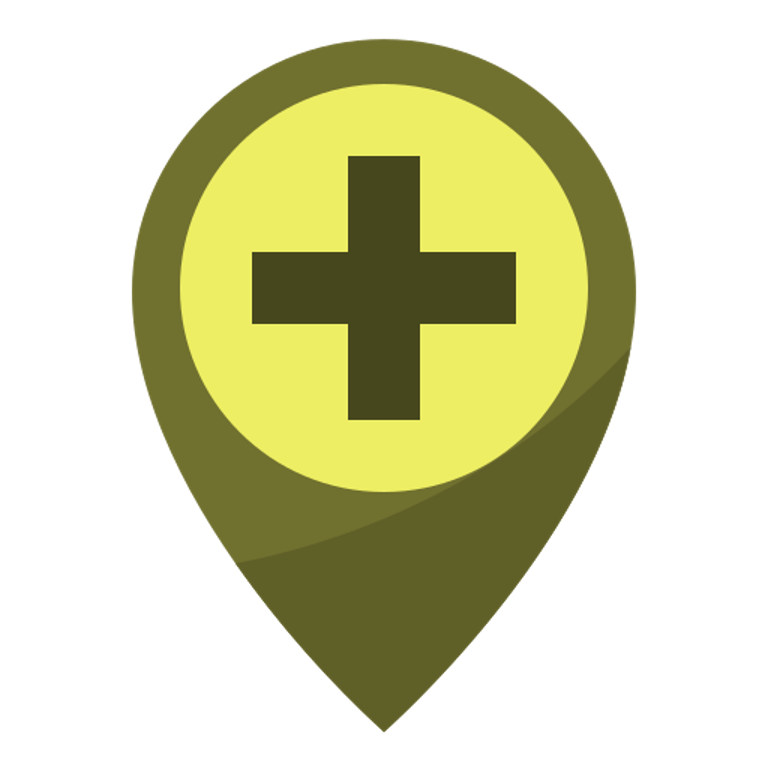
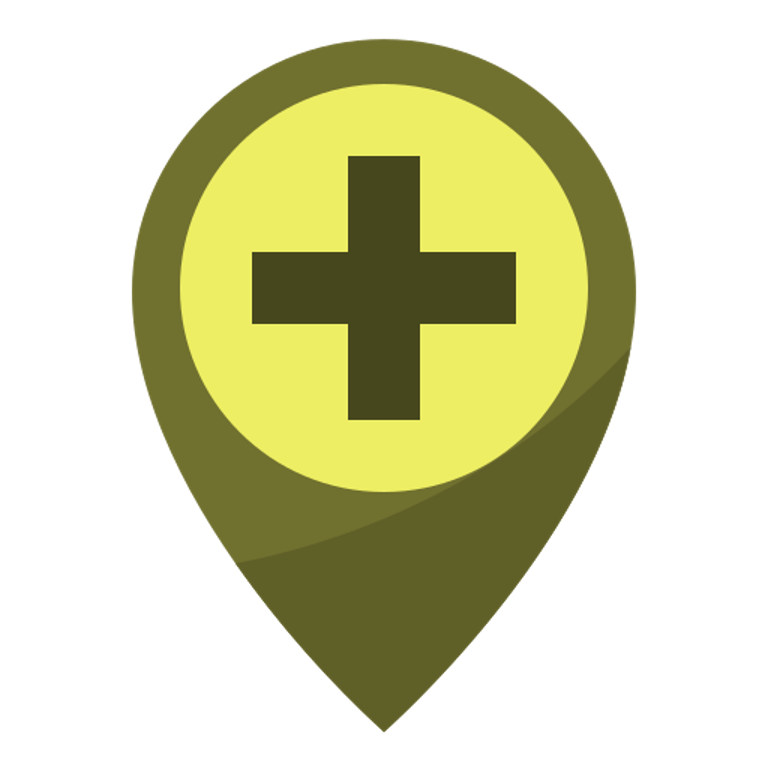
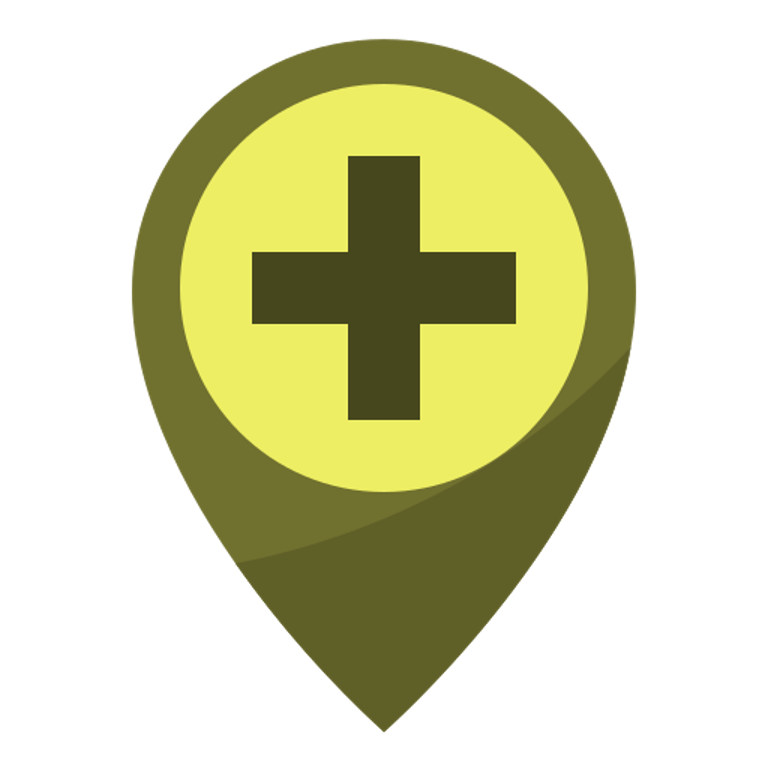
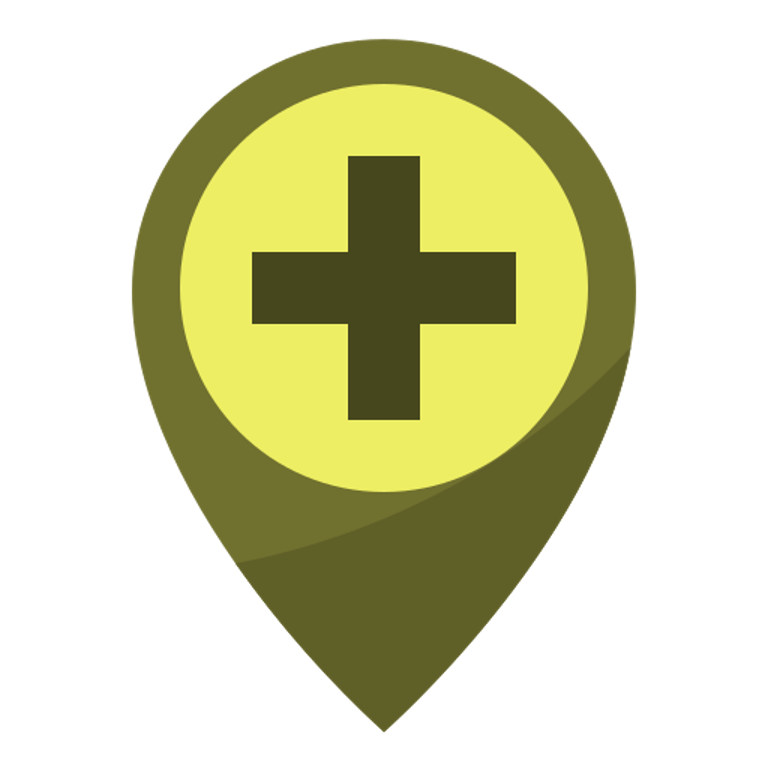
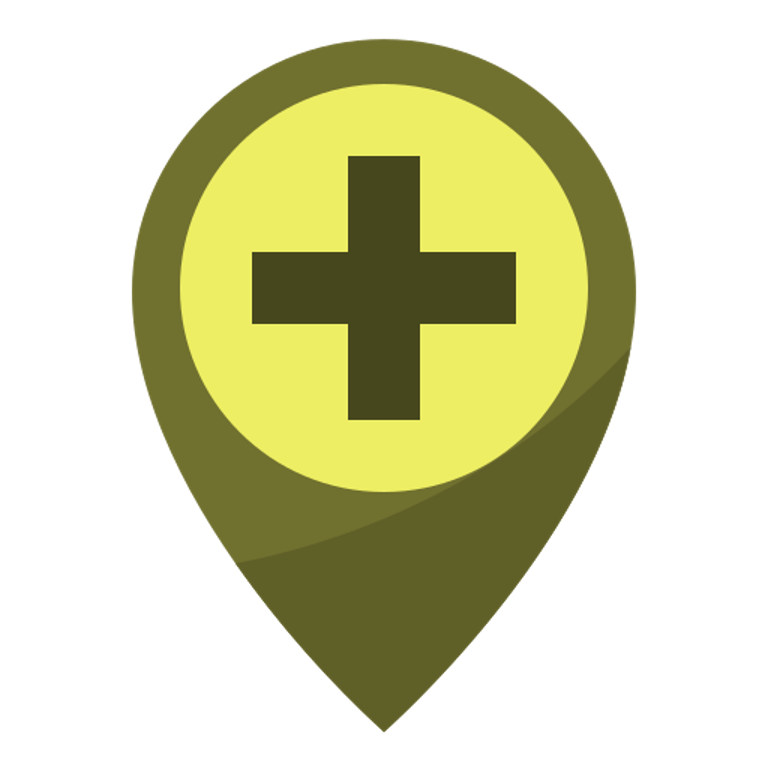
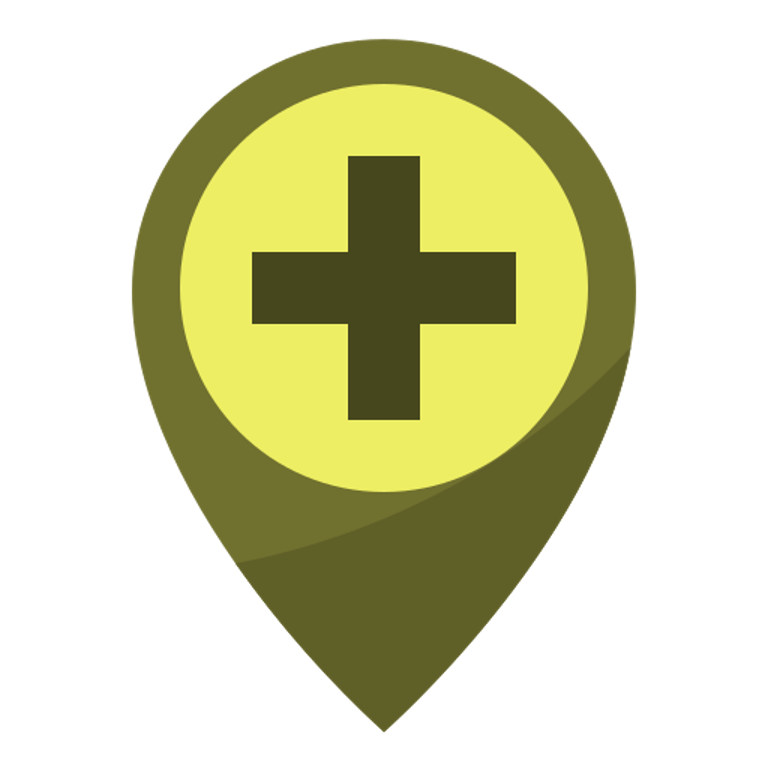
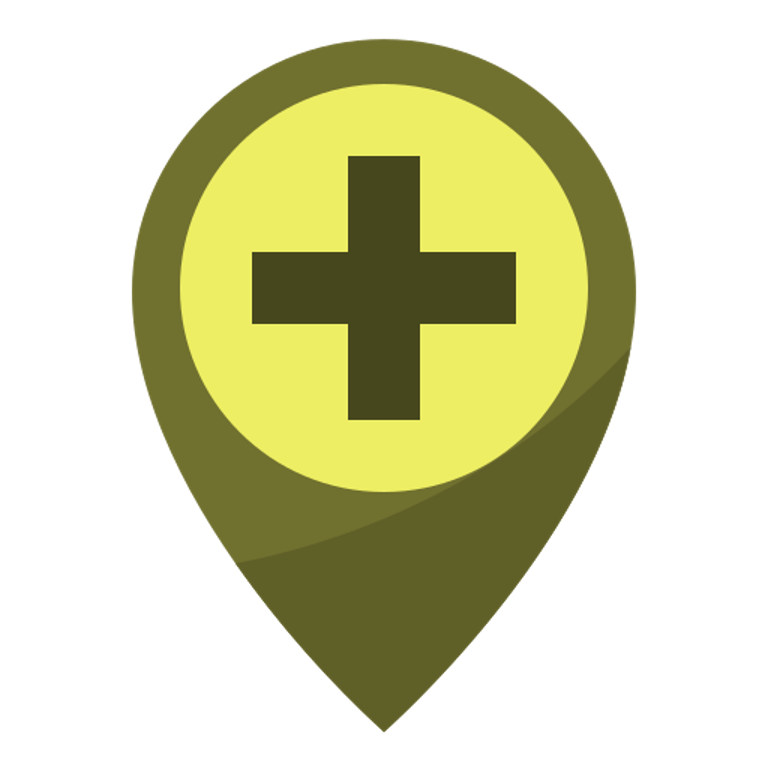
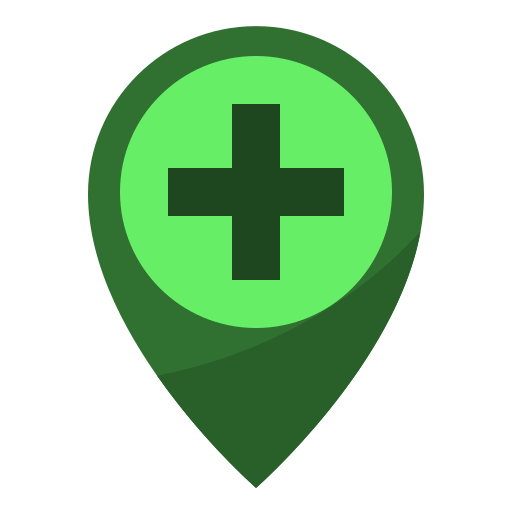
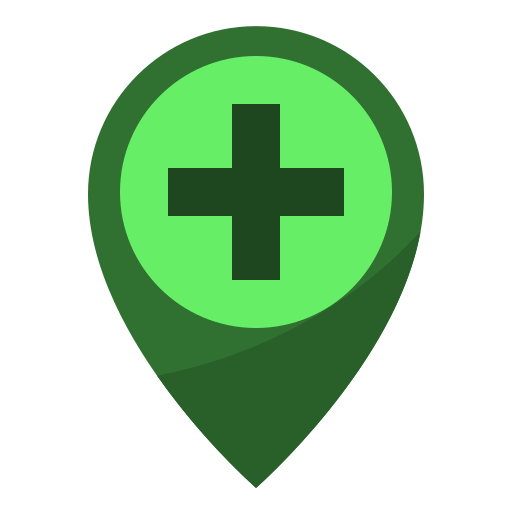
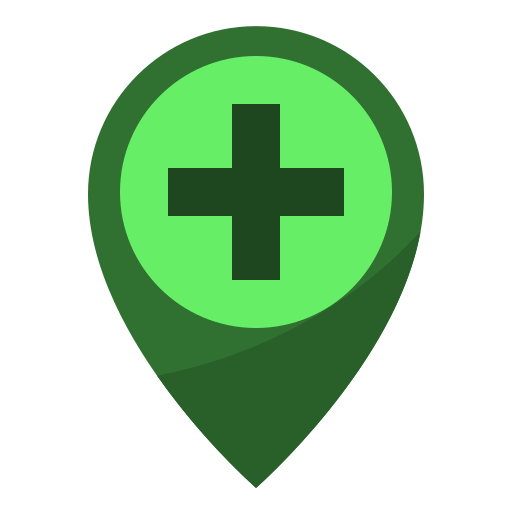
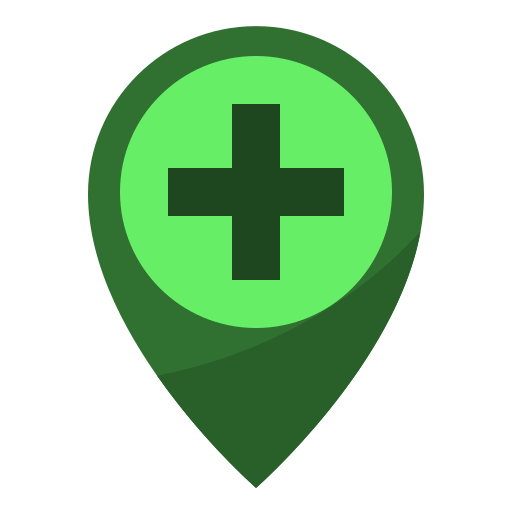
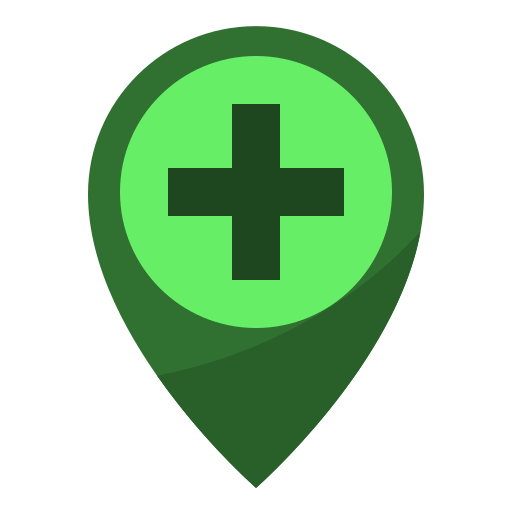
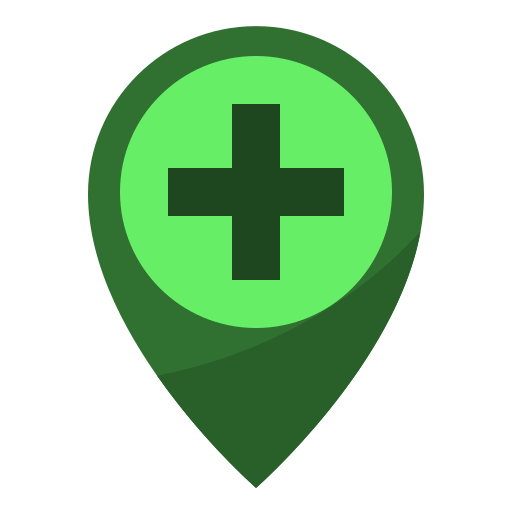
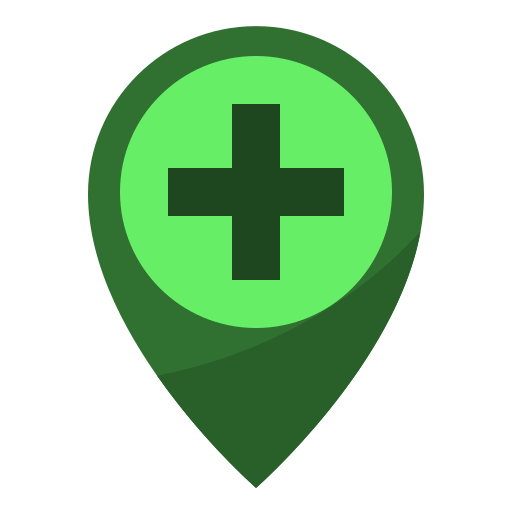
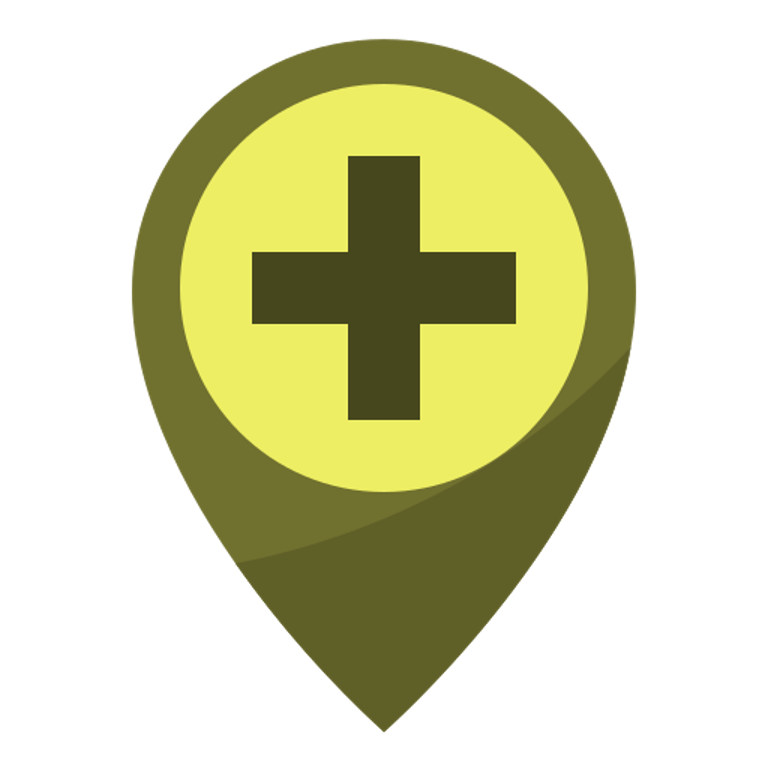
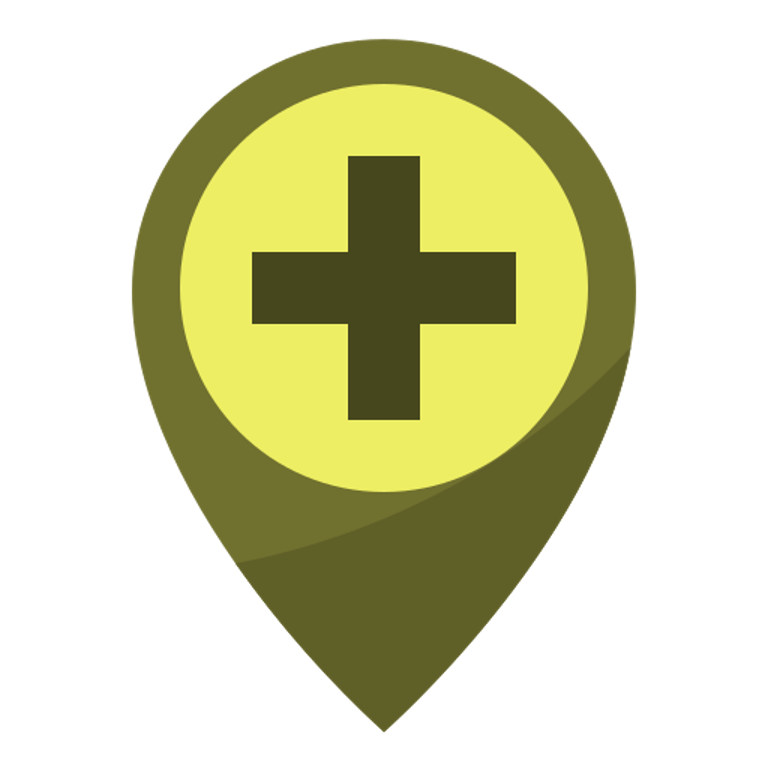
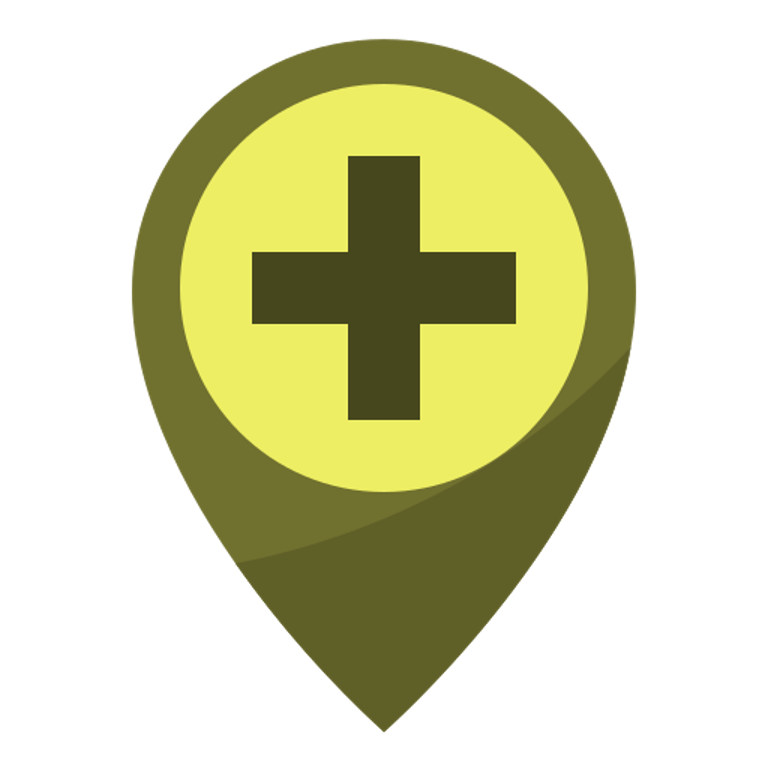
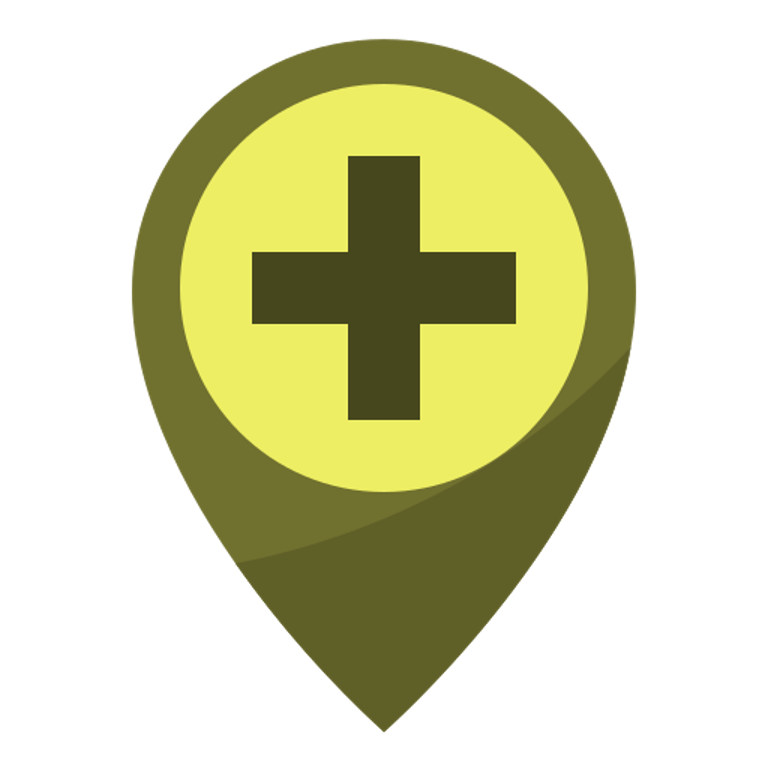
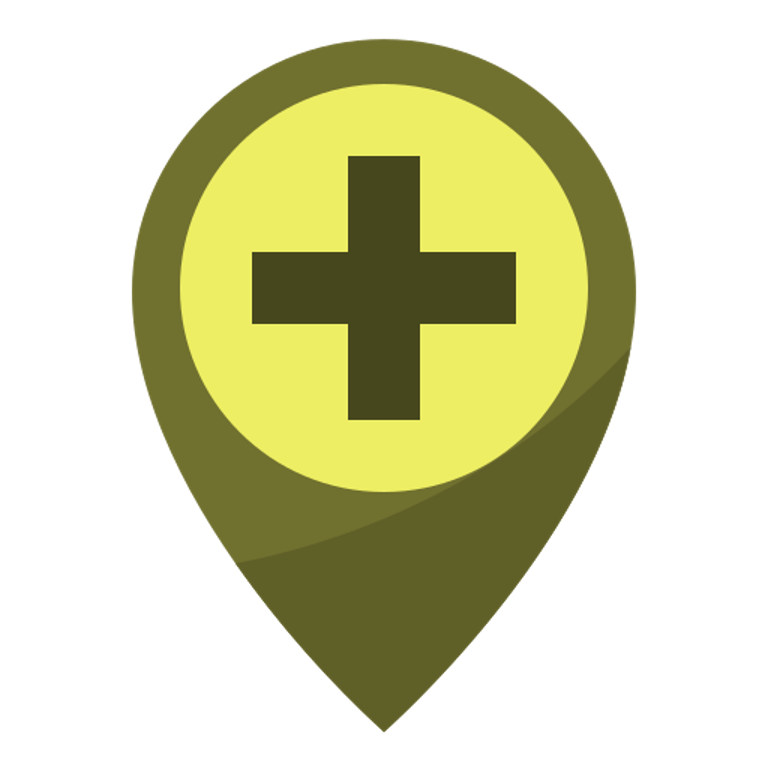
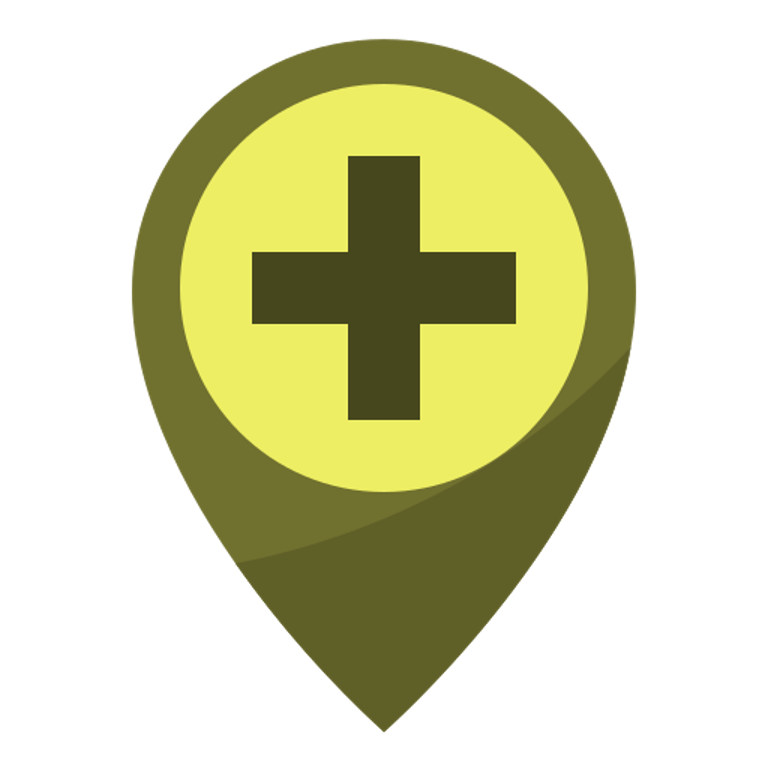
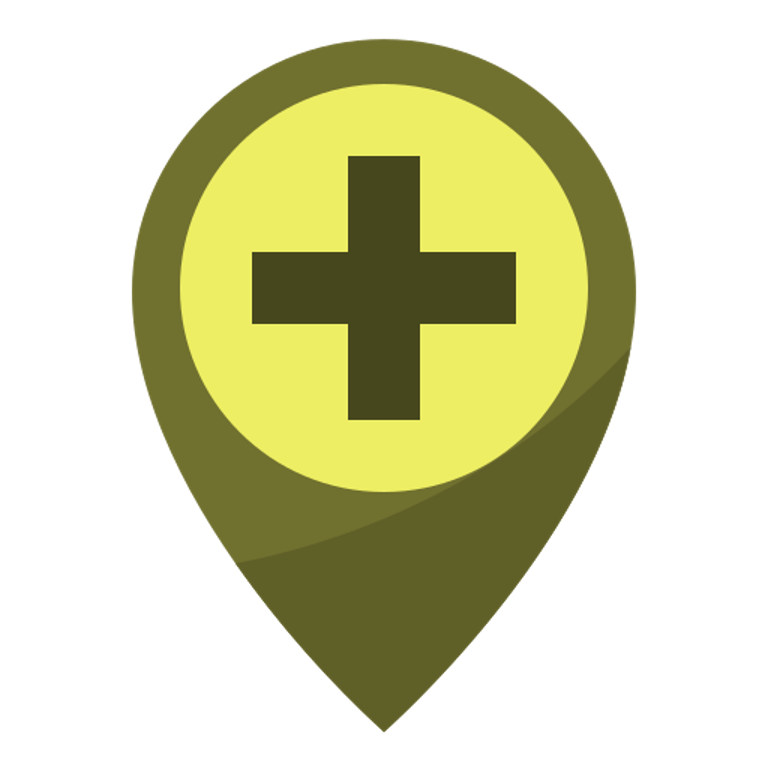
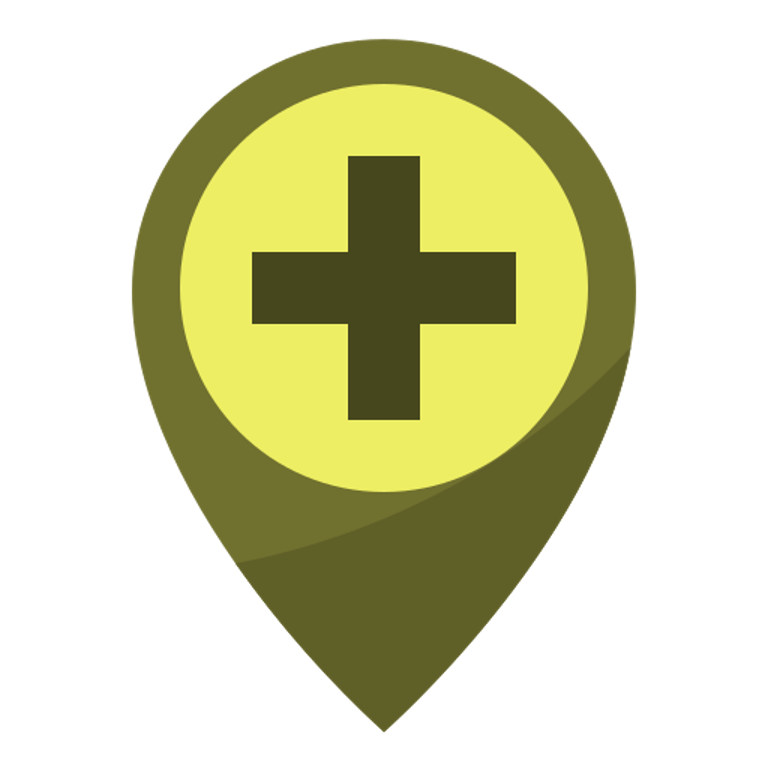
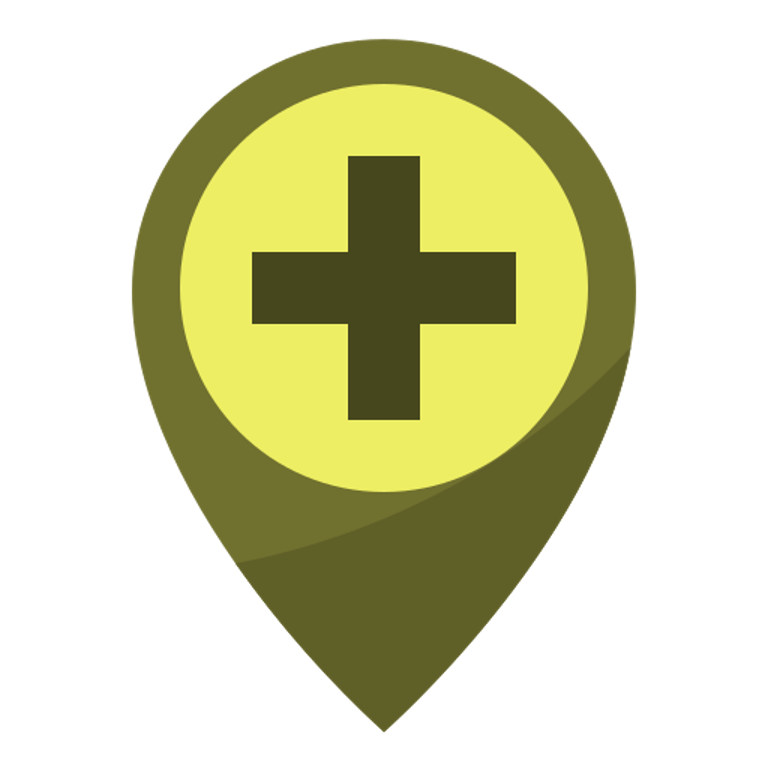
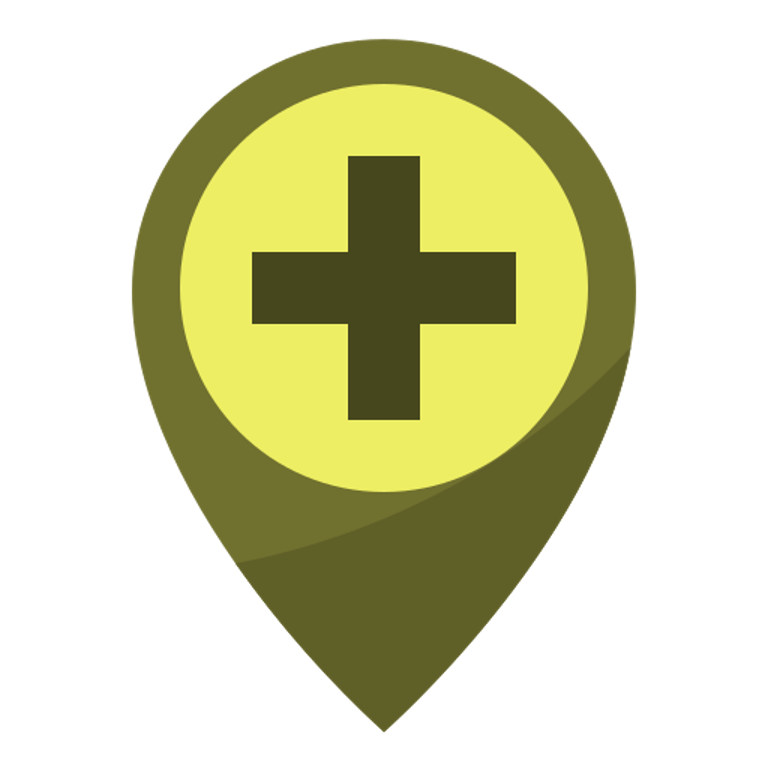
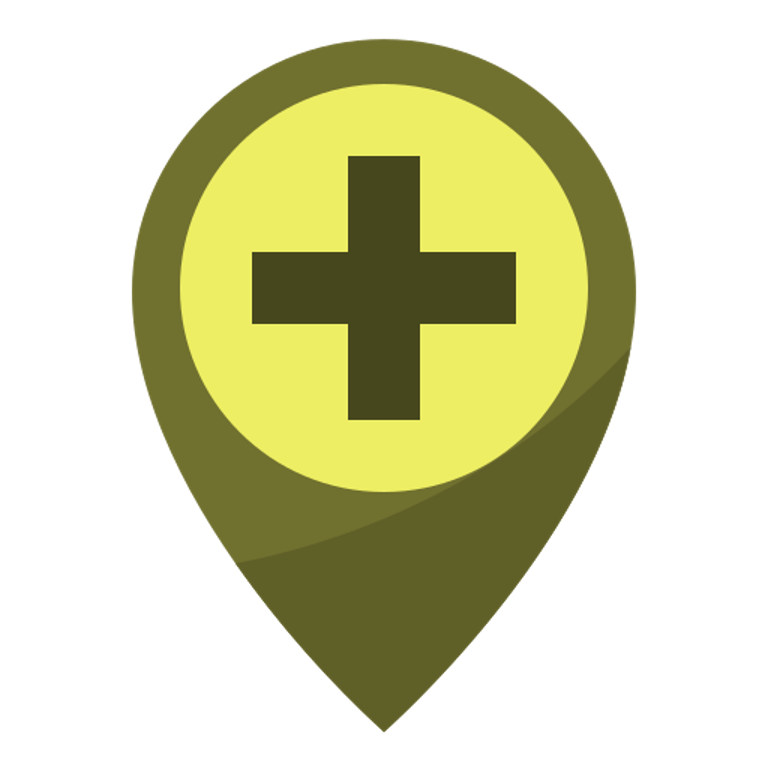
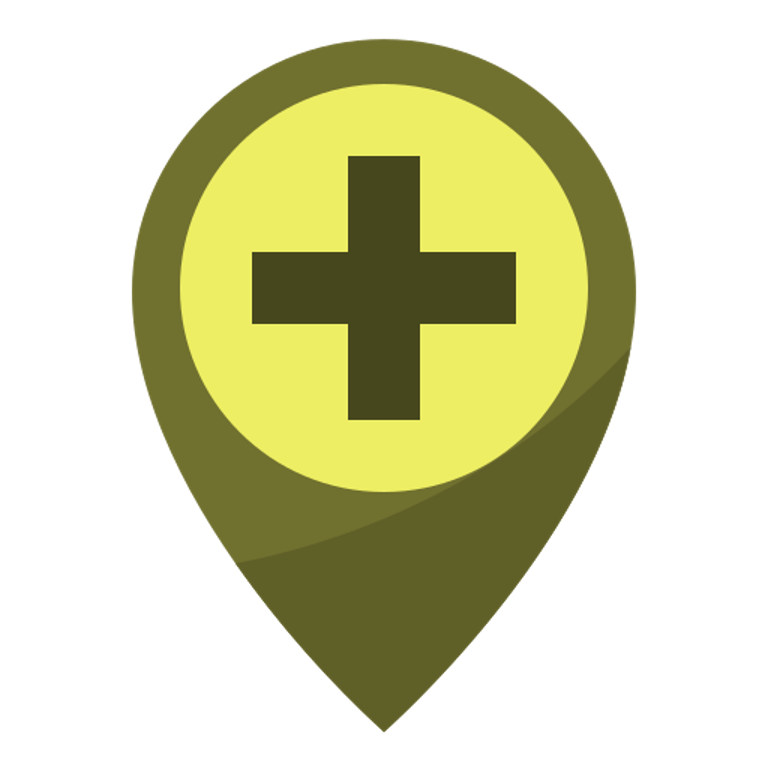
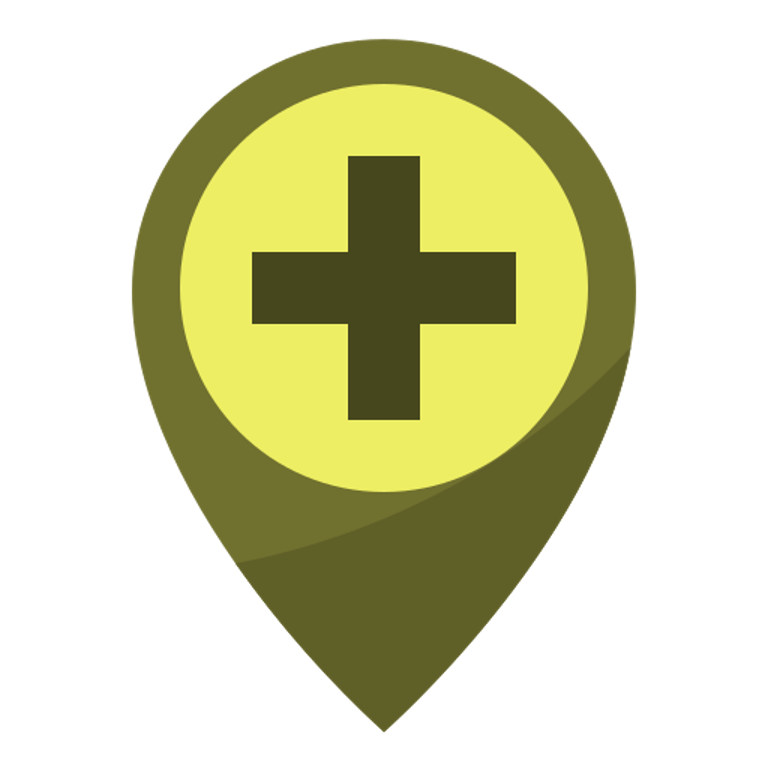
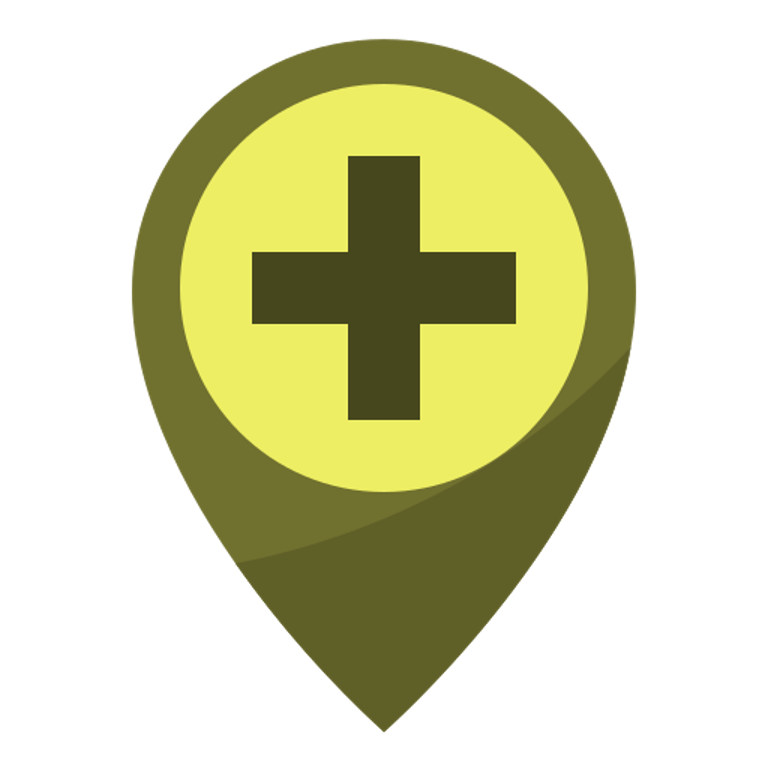
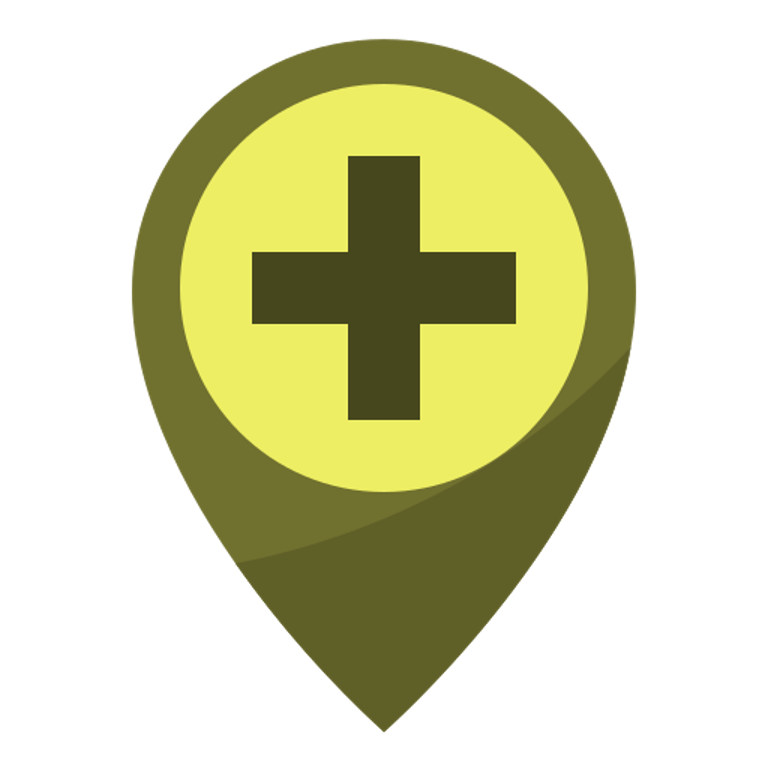
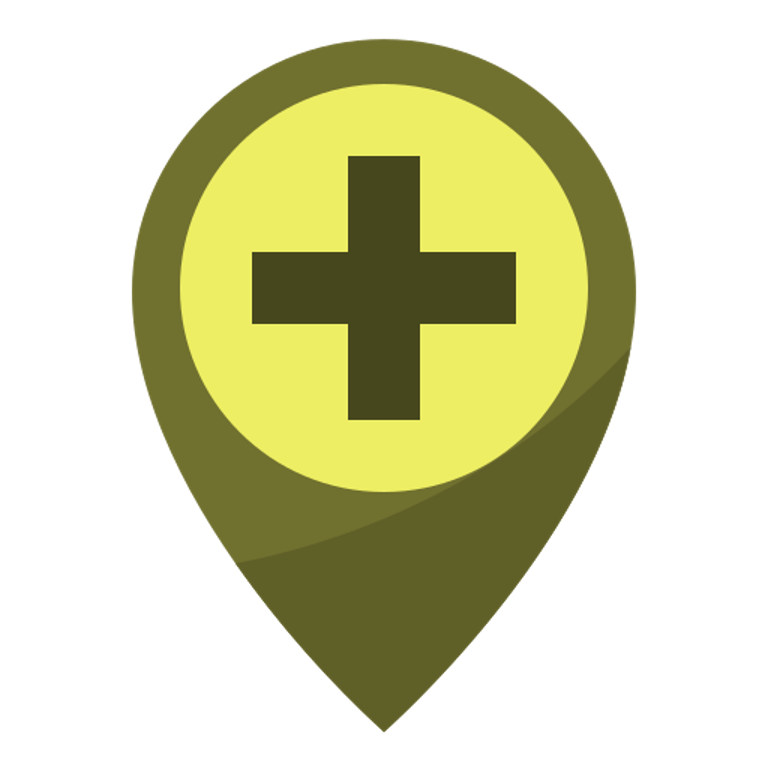
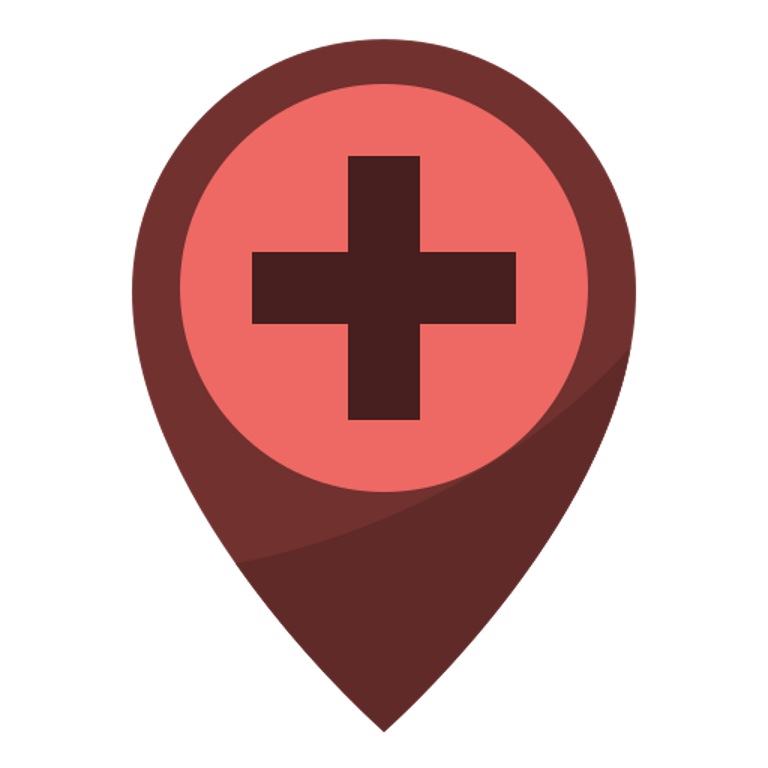
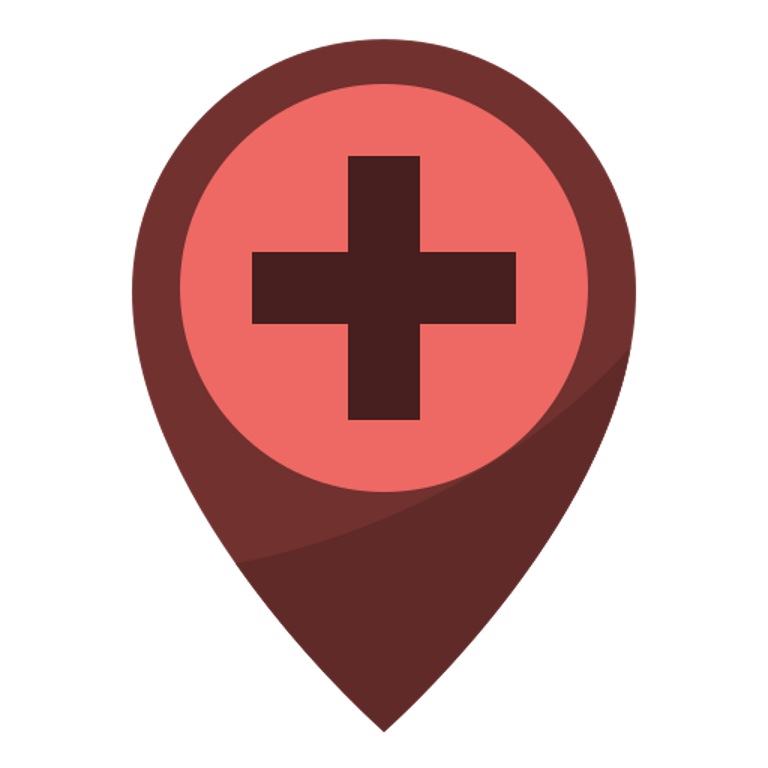
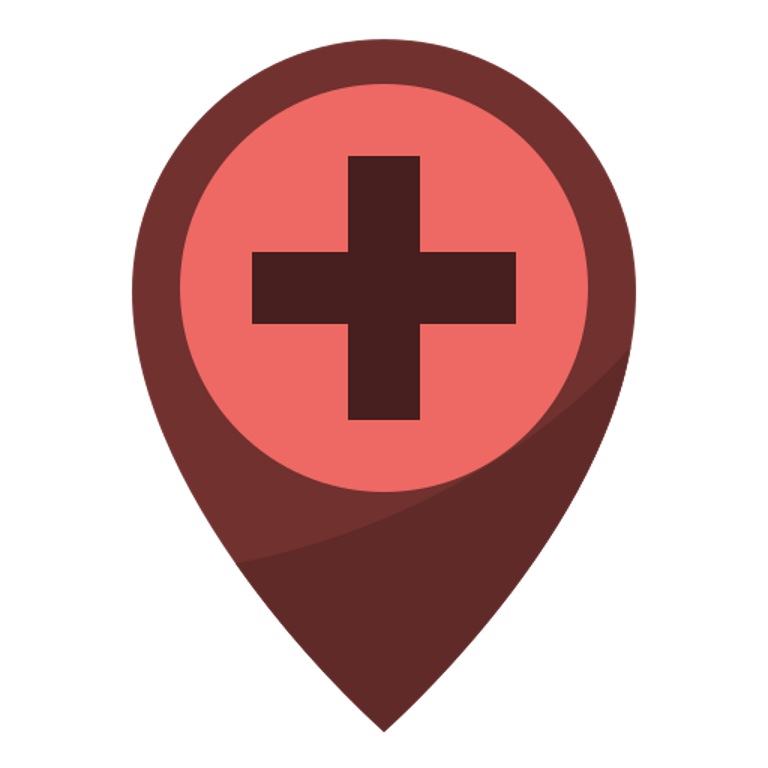
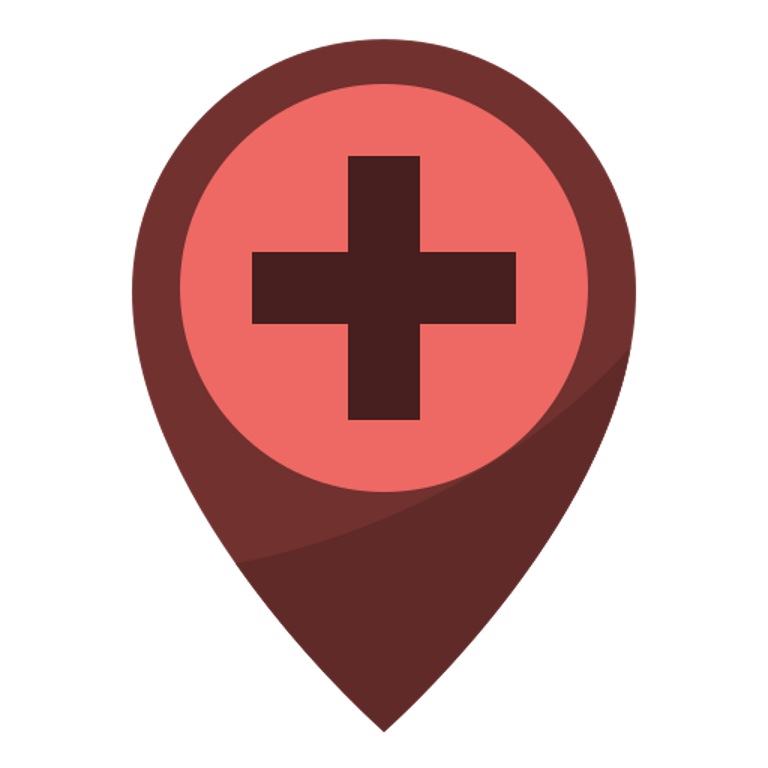
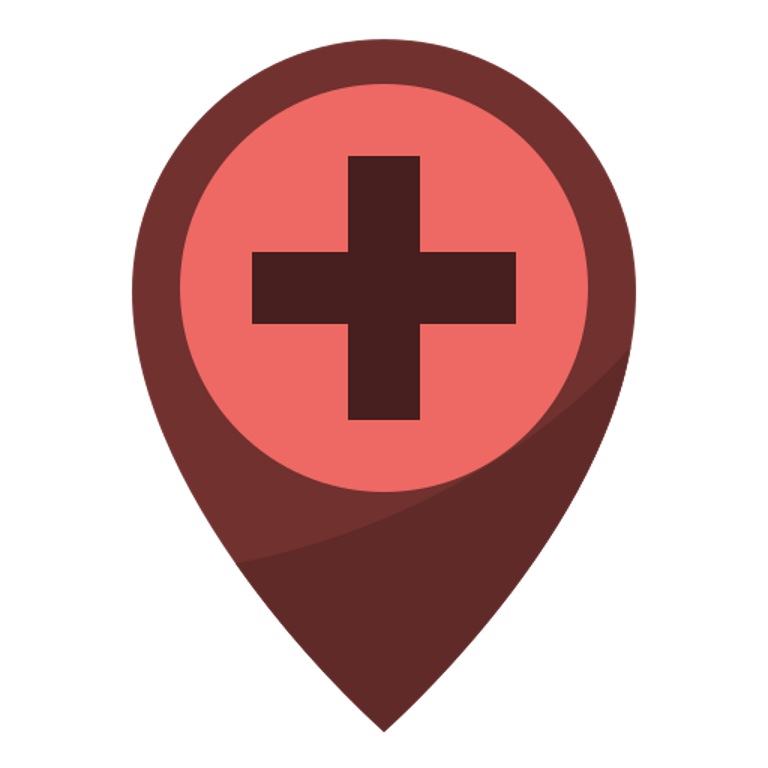
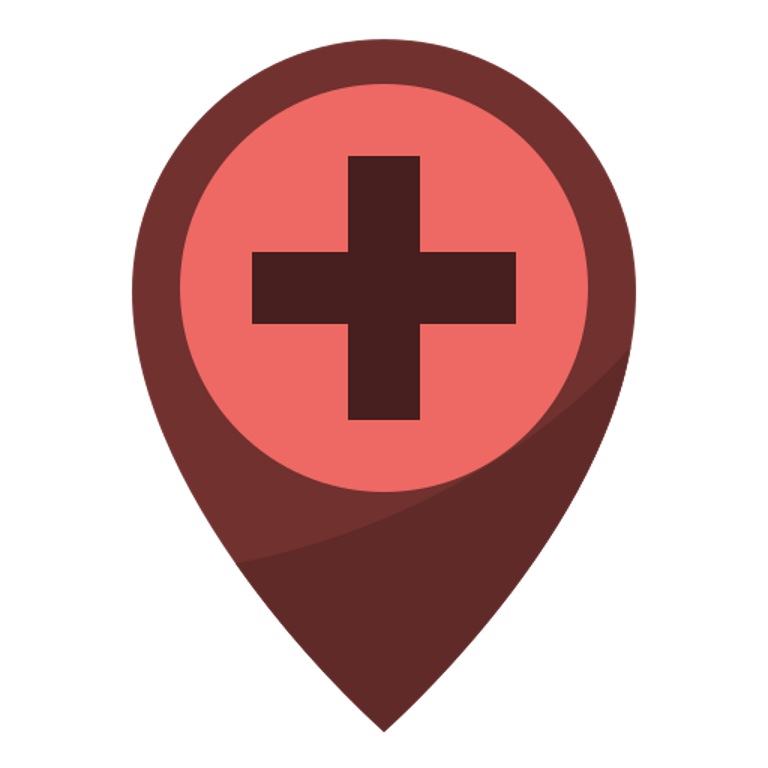
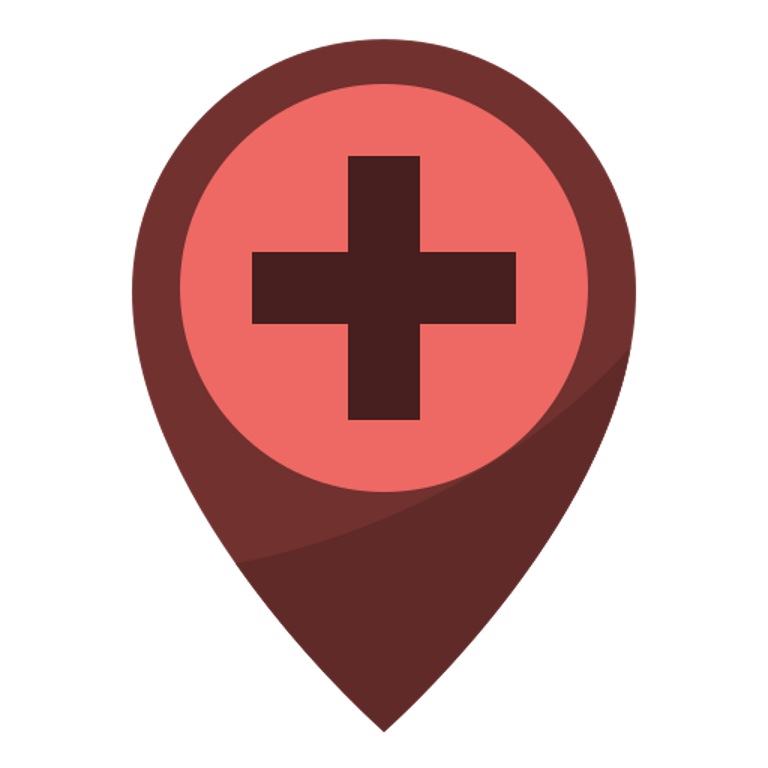
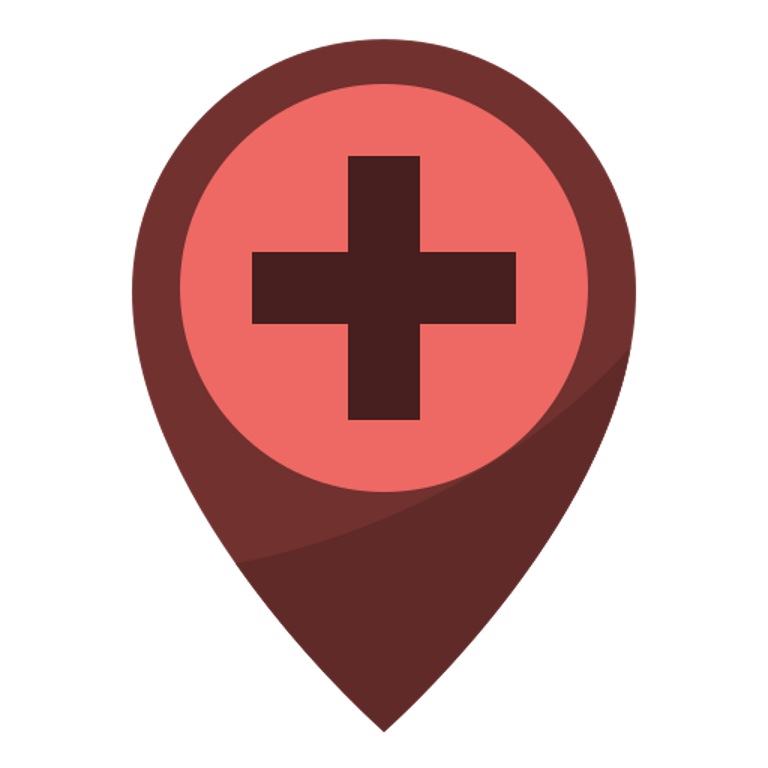
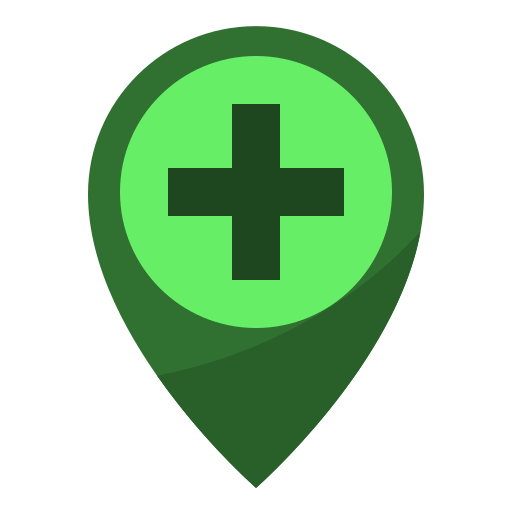
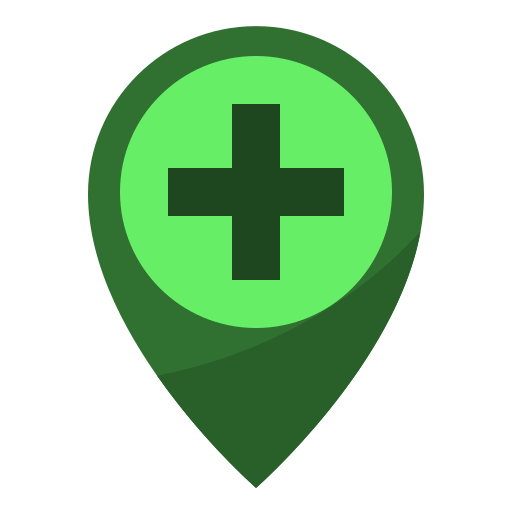

In [9]:
mapa = folium.Map(location=[-23.550520, -46.633308], zoom_start=12, tiles='CartoDB Positron')

for index, row in df_hospitais.iterrows():
    # Cria o conteúdo da popup com informações adicionais e link clicável
    popup_content = f"<b>{row['Nome_Hospital']}</b><br>" \
                    f"Endereço: {row['Endereço']}<br>" \
                    f"Telefone: {row['Telefone']}<br>" \
                    f"Horário: {row['Horário']}<br>" \
                    f"Link para + Infos: <a href='{row['Link_+Infos']}' target='_blank'>Clique aqui</a>"

    # Determina o ícone com base no valor da coluna "VALOR"
    if row['Valor'] < 0.4:
        icon_cor = 'verde'
    elif 0.4 <= row['Valor'] <= 0.8:
        icon_cor = 'amarelo'
    else:
        icon_cor = 'vermelho'

    icon = folium.CustomIcon(icon_image=f'd:\Icones\icon_{icon_cor}.png', 
                             icon_size=(50, 50),
                             icon_anchor=(14, 50))

    # Adiciona o marcador com a popup personalizada
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=folium.Popup(popup_content, max_width=300),  # Define uma largura máxima para a popup
                  icon=icon).add_to(mapa)
mapa


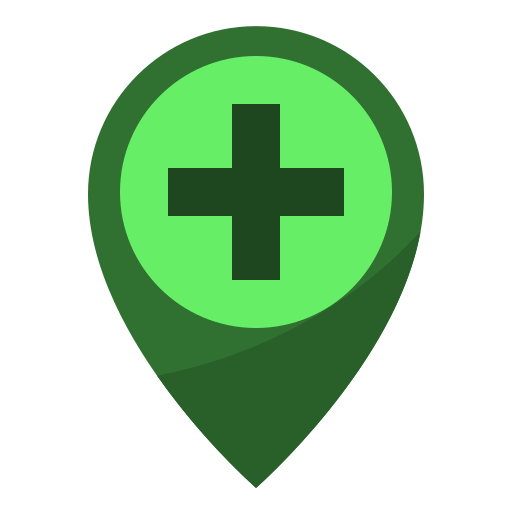
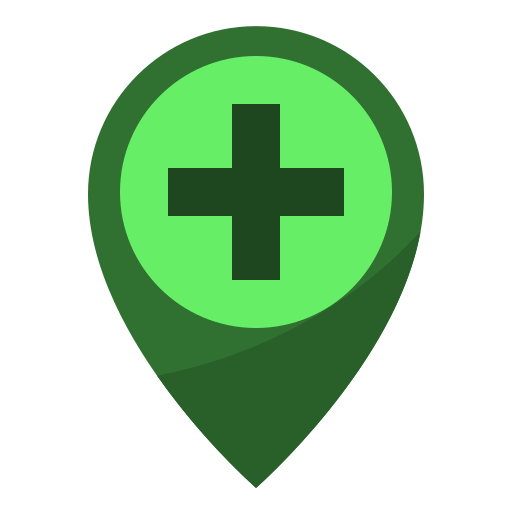
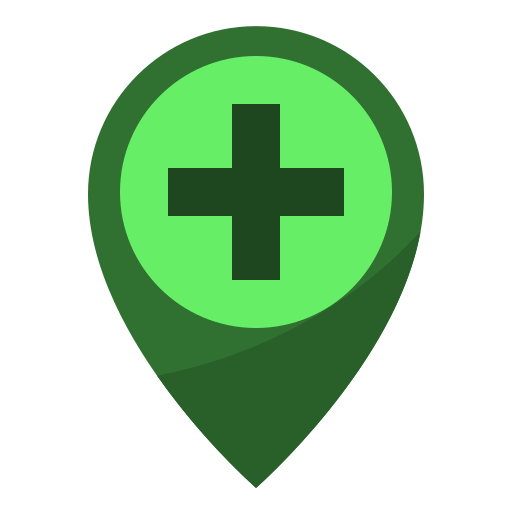
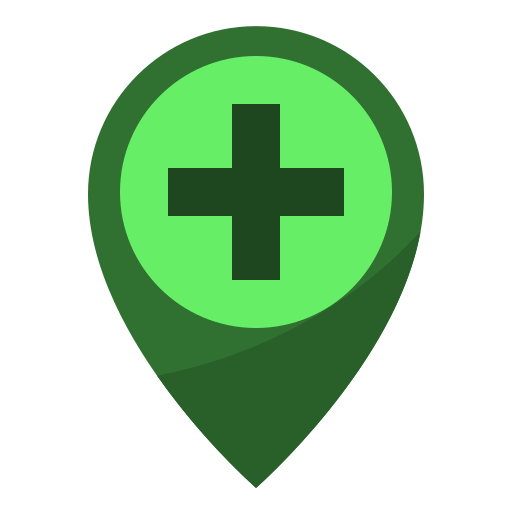
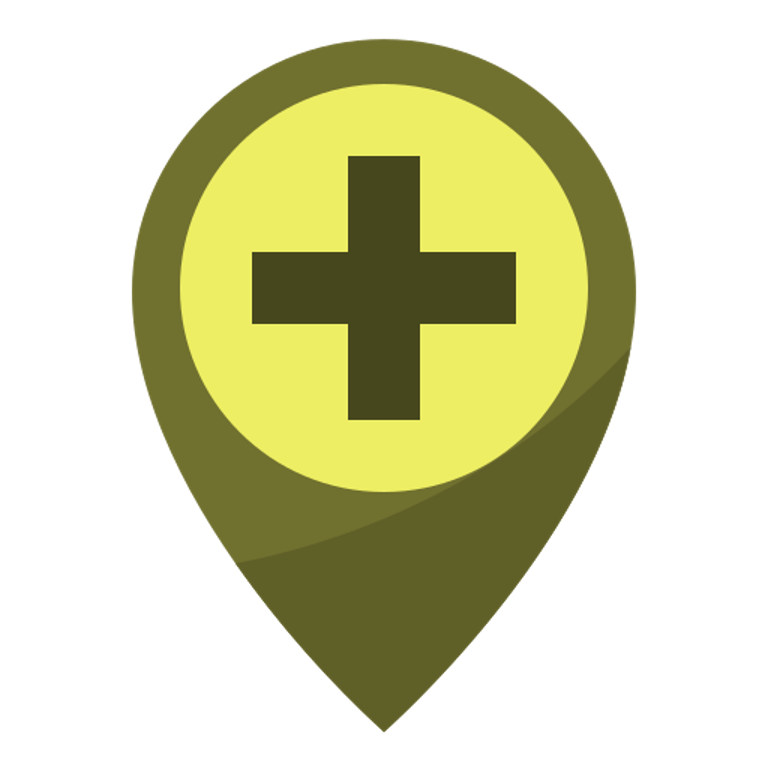

In [29]:
import pandas as pd
from geopy.geocoders import Nominatim
import numpy as np
import folium

# Define your location
your_location = "R. Monte Alegre, 984 - Perdizes"

# Use geopy's Nominatim to convert your location to latitude and longitude
geolocator = Nominatim(user_agent="geoapiExercises")
location = geolocator.geocode(your_location)
your_latitude, your_longitude = location.latitude, location.longitude

# Define a function to calculate distance using haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    p = np.pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p) * np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p))/2
    return 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

# Apply this function to each row of the DataFrame to calculate distance from your location to each hospital
df_hospitais['Distance'] = df_hospitais.apply(lambda row: calculate_distance(your_latitude, your_longitude, row['Latitude'], row['Longitude']), axis=1)

# Sort the DataFrame by the 'Distance' and 'Valor' columns
df_hospitais_sorted = df_hospitais.sort_values(by=['Distance', 'Valor'])

# Get the 5 nearest hospitals with the lowest value
nearest_hospitals = df_hospitais_sorted[:5]

# Create a map centered at your location
m = folium.Map(location=[your_latitude, your_longitude], zoom_start=14)

# Add a marker for your location
folium.Marker([your_latitude, your_longitude], popup='Your Location', icon=folium.Icon(color='blue')).add_to(m)

colors = ['red', 'blue', 'green', 'purple', 'orange']

for index, hospital in nearest_hospitals.iterrows():
    # Determine the icon color based on the "Valor" column
    if hospital['Valor'] < 0.4:
        icon_cor = 'verde'
    elif 0.4 <= hospital['Valor'] <= 0.8:
        icon_cor = 'amarelo'
    else:
        icon_cor = 'vermelho'

    # Create the popup content for the nearest hospital
    popup_content = f"<b>{hospital['Nome_Hospital']}</b><br>" \
                    f"Endereço: {hospital['Endereço']}<br>" \
                    f"Telefone: {hospital['Telefone']}<br>" \
                    f"Horário: {hospital['Horário']}<br>" \
                    f"Distância: {hospital['Distance']:.2f} km<br>" \
                    f"Link para + Infos: <a href='{hospital['Link_+Infos']}' target='_blank'>Clique aqui</a>"

    # Add a marker for the nearest hospital
    hospital_location = [hospital['Latitude'], hospital['Longitude']]
    icon = folium.CustomIcon(icon_image=f'd:\Icones\icon_{icon_cor}.png', icon_size=(50, 50), icon_anchor=(14, 50))
    folium.Marker(hospital_location, popup=folium.Popup(popup_content, max_width=300), icon=icon).add_to(m)

    # Draw a line between your location and the nearest hospital
    folium.PolyLine(locations=[(your_latitude, your_longitude), hospital_location], color=colors[index % len(colors)]).add_to(m)

# Display the map
m